In [ ]:
!pip install libsvm-official

# Importing Necessary Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from libsvm.svmutil import *
from tabulate import tabulate

## Problem 1 (SVM)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Functions for different metric

In [ ]:
# Plotting Confusion Matrix
def plot_confusion_matrix(data, labels, classifier):
    import seaborn
    seaborn.set(color_codes=True)
    plt.figure(1, figsize=(7,7))
 
    plt.title("Confusion Matrix for {}".format(classifier))
 
    seaborn.set(font_scale=1)
    ax = seaborn.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'}, fmt='g')
 
    ax.set_xticklabels(labels.astype(int))
    ax.set_yticklabels(labels.astype(int))
 
    ax.set(ylabel="True Label", xlabel="Predicted Label")

    plt.show()

# calculating Confusion Matrix and F1 Scores
def confusion_matrix_and_F1_score(y_pred,y_true,string):
  num_classes = len(np.unique(y_true))
  first_label = int(np.min(y_true))

  # initialize confusion matrix with zeros
  confusion_matrix = np.zeros((num_classes+first_label, num_classes+first_label))

  # loop over all samples
  for i in range(len(y_true)):
      # increment count of true-predicted label pair
      confusion_matrix[int(y_true[i]), int(y_pred[i])] += 1

  confusion_matrix = confusion_matrix[first_label:,first_label:]
  # plot_confusion_matrix(confusion_matrix, np.unique(y_true),string)


  # calculate precision, recall, and F1 score for each class
  class_precision = np.zeros(num_classes)
  class_recall = np.zeros(num_classes)
  class_f1 = np.zeros(num_classes)
  for i in range(num_classes):
      class_precision[i] = confusion_matrix[i,i] / np.sum(confusion_matrix[:,i])
      class_recall[i] = confusion_matrix[i,i] / np.sum(confusion_matrix[i,:])
      class_f1[i] = 2 * (class_precision[i] * class_recall[i]) / (class_precision[i] + class_recall[i])
  print("F1- Scores: ",class_f1)
  plot_confusion_matrix(confusion_matrix, np.unique(y_true),string)



## Function for Grid Search

In [ ]:
def grid_search(X, y, gamma_start, gamma_end, gamma_interval, C_start, C_end, KERNEL):
    graph_C = []
    graph_Gamma = []
    graph_z = []
    optimal_model = None
    max_acc = 0.0
    for C_value in np.arange(C_start, C_end, 0.2):
        graph_x_row = []
        graph_y_row = []
        graph_z_row = []
        for gamma_value in np.arange(gamma_start, gamma_end, gamma_interval):
            print(f"Accuracy for C = {C_value}, gamma = {gamma_value}")
            #hyperparams = (alpha_value,gamma_value)
            problem = svm_problem(y, X, isKernel=True)
            model = svm_train(problem, svm_parameter('-t '+str(KERNEL)+' -g '+str(gamma_value)+' -c ' + str(C_value) + ' -q'))
            p_labels, p_acc, p_vals = svm_predict(y, X, model)
            acc = p_acc[0]
            
            if(acc > max_acc):
                optimal_model = model
            graph_x_row.append(C_value)
            graph_y_row.append(gamma_value)
            graph_z_row.append(acc)
        graph_C.append(graph_x_row)
        graph_Gamma.append(graph_y_row)
        graph_z.append(graph_z_row)
        print('')
    graph_C = np.array(graph_C)
    graph_Gamma = np.array(graph_Gamma)
    graph_z = np.array(graph_z)
    max_z = np.max(graph_z)
    pos_max_z = np.argwhere(graph_z == np.max(graph_z))[0]
    print('maximum ACC: %.4f' %(max_z))
    print('Optimum C: %f' %(graph_C[pos_max_z[0],pos_max_z[1]]))
    print('Optimum gamma: %f' %(graph_Gamma[pos_max_z[0],pos_max_z[1]]))
    return graph_C[pos_max_z[0],pos_max_z[1]] ,graph_Gamma[pos_max_z[0], pos_max_z[1]], max_z, optimal_model

In [ ]:
def one_vs_rest(y, class_type):
    temp_y = np.zeros(len(y))
    temp_y[(y==class_type)] = 1
    temp_y[y != class_type] = 0
    return temp_y

### Problem 3 (Assignment 1) Dataset 

### Importing Data sets

In [ ]:
# Training Data
p3_train = np.genfromtxt("/content/drive/MyDrive/data/p3_train.csv", delimiter=",", dtype=float)

# Testing Data
p3_test = np.genfromtxt("/content/drive/MyDrive/data/p3_test.csv", delimiter=",", dtype=float)

# splitting 
x3_train, y3_train = p3_train[:4000, 0:-1], p3_train[:4000, -1]
x3_test, y3_test = p3_test[4000:, 0:-1], p3_test[4000:, -1]


In [ ]:
# Importing Data
p4 = np.genfromtxt("/content/drive/MyDrive/data/p4_data.csv", delimiter=",", dtype=float)

# Normalizing
p4_normalized = p4.copy()
p4_normalized[:,0:-1] = p4_normalized[:,0:-1]/255

# Splitting 
p4_train_20_80 = p4_normalized[0:12000,:]
x4_train, y4_train = p4_train_20_80[:, 0:-1], p4_train_20_80[:, -1]

p4_test_20_80 = p4_normalized[12000:,:]
x4_test, y4_test = p4_test_20_80[:, 0:-1], p4_test_20_80[:, -1]

In [ ]:
p5 = np.genfromtxt("/content/drive/MyDrive/data/PCA_MNIST.csv", delimiter=",", dtype=float)
l = p5[1:,:][:,0]
t  =p5[1:,:][:,1:]
p5 = np.column_stack((t,l))

In [ ]:
p5_normalized = p5.copy()
for i in range(10):
  p5_normalized[:,i] = (p5_normalized[:,i] - np.min(p5_normalized[:,i]))/(np.max(p5_normalized[:,i])-np.min(p5_normalized[:,i]))

p5_train_20_80 = p5_normalized[0:12000,:]
p5_test_20_80 = p5_normalized[12000:,:]

x5_train, y5_train = p5_train_20_80[:, 0:-1], p5_train_20_80[:, -1]
x5_test, y5_test = p5_test_20_80[:, 0:-1], p5_test_20_80[:, -1]


## With Slack Formulation

### For P3 (Assignment 1)

### 1. Polynomial: (gamma * u' * v  + coef0)^degree

In [ ]:
KERNEL = 1

problem3 = svm_problem(y3_train, x3_train)

param3 = svm_parameter("-t 1 -g 0.065 -c 1")
model3 = svm_train(problem3, param3)
p3_poly_pred_labels, p3_poly_acc_test, vals3 = svm_predict(y3_test, x3_test, model3)

Accuracy = 55.0818% (6059/11000) (classification)


In [ ]:
print("Training Accuracy: ")
p3_poly_pred_labels, p3_poly_acc_train, vals3 = svm_predict(y3_train, x3_train, model3)


Training Accuracy: 
Accuracy = 61.625% (2465/4000) (classification)


In [ ]:
print("Testing Accuracy: ")
p3_poly_pred_labels, p3_poly_acc_test, vals3 = svm_predict(y3_test, x3_test, model3)

Testing Accuracy: 
Accuracy = 55.0818% (6059/11000) (classification)


### Confusion Matrix

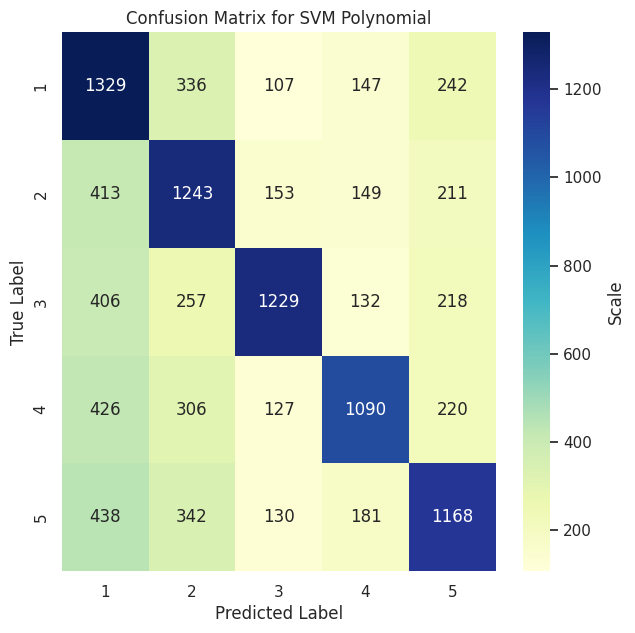

In [ ]:
p3_poly_confusion_matrix, p3_poly_F1_score = confusion_matrix_and_F1_score(p3_poly_pred_labels, y3_test)

plot_confusion_matrix(p3_poly_confusion_matrix, np.unique(y3_test), "SVM Polynomial")


### 2. Radial Basis Function: exp(-gamma*|u-v|^2)

In [ ]:
KERNEL = 2

problem3_RBF = svm_problem(y3_train, x3_train)
# print("Accuracy for Training")
param3_RBF = svm_parameter("-t 2 -g 0.008 -c 2")
model3_RBF = svm_train(problem3_RBF, param3_RBF)
p3_RBF_pred_labels, p3_RBF_acc_test, vals3 = svm_predict(y3_test, x3_test, model3_RBF)
print(p3_RBF_acc_test)

Accuracy = 58.1909% (6401/11000) (classification)
(58.190909090909095, 2.279272727272727, 0.20041586961765914)


In [ ]:
print("Training Accuracy: ")
p3_RBF_pred_labels, p3_RBF_acc_train, vals3 = svm_predict(y3_train, x3_train, model3_RBF)


Training Accuracy: 
Accuracy = 58.7% (2348/4000) (classification)


In [ ]:
print("Testing Accuracy: ")
p3_RBF_pred_labels, p3_RBF_acc_test, vals3 = svm_predict(y3_test, x3_test, model3_RBF)

Testing Accuracy: 
Accuracy = 58.1909% (6401/11000) (classification)


### Confusion Matrix

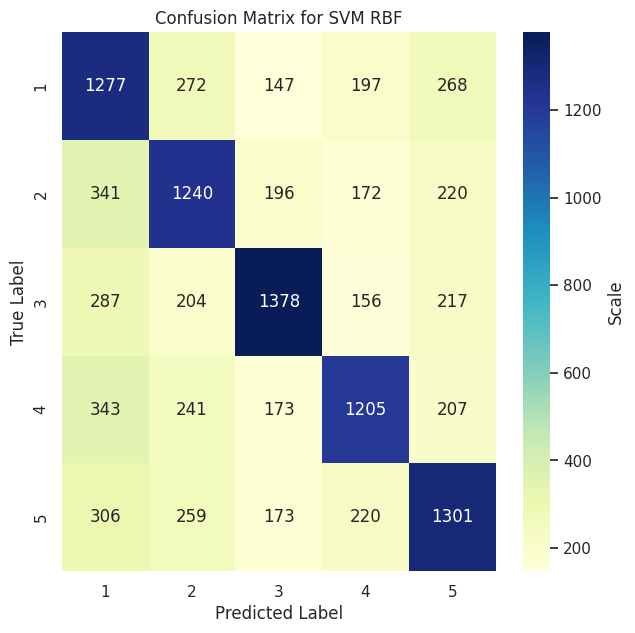

In [ ]:
p3_RBF_confusion_matrix, p3_RBF_F1_score = confusion_matrix_and_F1_score(p3_RBF_pred_labels, y3_test)

plot_confusion_matrix(p3_RBF_confusion_matrix, np.unique(y3_test), "SVM RBF")


### 3. Sigmoid: tanh(gamma * u' * v + coef0) 

In [ ]:
KERNEL = 3

problem3_Sigm = svm_problem(y3_train, x3_train)
# print("Accuracy for Training")
param3_Sigm = svm_parameter("-t 3 -g 0.008 -c 2")
model3_Sigm = svm_train(problem3_Sigm, param3_Sigm)
p3_Sigm_pred_labels, p3_Sigm_acc_test, vals3 = svm_predict(y3_test, x3_test, model3_Sigm)
print(p3_Sigm_acc_test)

Accuracy = 56.6636% (6233/11000) (classification)
(56.66363636363636, 2.355909090909091, 0.1785857880512794)


In [ ]:
print("Training Accuracy: ")
p3_Sigm_pred_labels, p3_Sigm_acc_train, vals3 = svm_predict(y3_train, x3_train, model3_Sigm)


Training Accuracy: 
Accuracy = 55.025% (2201/4000) (classification)


In [ ]:
print("Testing Accuracy: ")
p3_Sigm_pred_labels, p3_Sigm_acc_test, vals3 = svm_predict(y3_test, x3_test, model3_Sigm)

Testing Accuracy: 
Accuracy = 56.6636% (6233/11000) (classification)


### Confusion Matrix

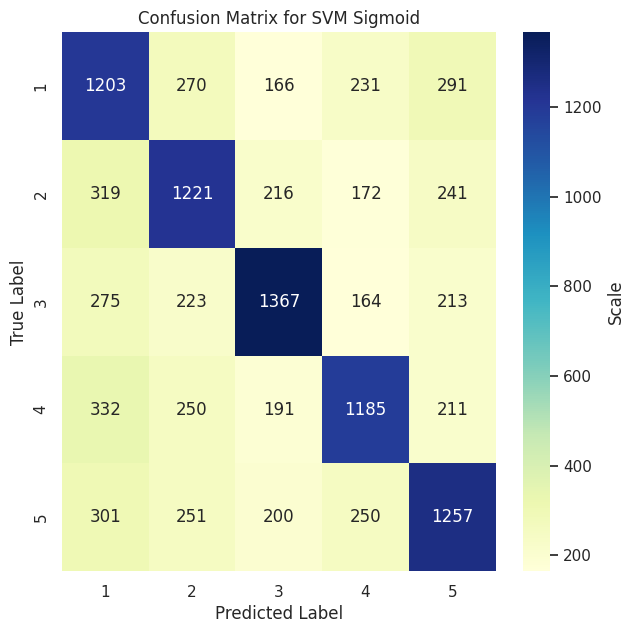

In [ ]:
p3_Sigm_confusion_matrix, p3_Sigm_F1_score = confusion_matrix_and_F1_score(p3_Sigm_pred_labels, y3_test)

plot_confusion_matrix(p3_Sigm_confusion_matrix, np.unique(y3_test), "SVM Sigmoid")


### F1 Scores

In [ ]:
P3_F1_score = [["Polynomial",p3_poly_F1_score],["RBF",p3_RBF_F1_score],["Sigmoid",p3_Sigm_F1_score]]
headers = [" ", "F1_scores"]
print(tabulate(P3_F1_score, headers, tablefmt="fancy_grid"))

╒════════════╤══════════════════════════════════════════════════════════╕
│            │ F1_scores                                                │
╞════════════╪══════════════════════════════════════════════════════════╡
│ Polynomial │ [0.51382177 0.53427896 0.61634905 0.56359876 0.5409912 ] │
├────────────┼──────────────────────────────────────────────────────────┤
│ RBF        │ [0.5416755  0.56556442 0.63959155 0.58509347 0.58184258] │
├────────────┼──────────────────────────────────────────────────────────┤
│ Sigmoid    │ [0.52406883 0.55702555 0.62391602 0.56820906 0.56216458] │
╘════════════╧══════════════════════════════════════════════════════════╛


### For P4 (Assignment 1)

### 1. Polynomial: (gamma * u' * v + coef0)^degree

In [ ]:
KERNEL = 1

problem4_poly = svm_problem(y4_train, x4_train)
# print("Accuracy for Training")
param4_poly = svm_parameter("-t 1 -g 0.1 -c 1")
model4_poly = svm_train(problem4_poly, param4_poly)

In [ ]:
print("Training Accuracy: ")
p4_poly_pred_labels, p4_poly_acc_train, vals4 = svm_predict(y4_train, x4_train, model4_poly)


Training Accuracy: 
Accuracy = 100% (12000/12000) (classification)


In [ ]:
print("Testing Accuracy: ")
p4_poly_pred_labels, p4_poly_acc_train, vals4 = svm_predict(y4_test, x4_test, model4_poly)


Testing Accuracy: 
Accuracy = 95.3229% (45755/48000) (classification)


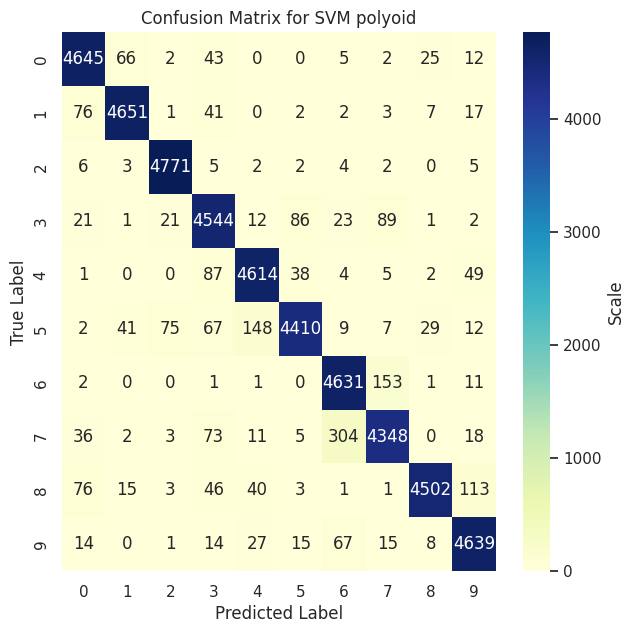

In [ ]:
p4_poly_confusion_matrix, p4_poly_F1_score = confusion_matrix_and_F1_score(p4_poly_pred_labels, y4_test)

plot_confusion_matrix(p4_poly_confusion_matrix, np.unique(y4_test), "SVM polyoid")


### 2. Radial Basis Function: exp(-gamma*|u-v|^2)

In [ ]:
KERNEL = 2

problem4_RBF = svm_problem(y4_train, x4_train)
# print("Accuracy for Training")
param4_RBF = svm_parameter("-t 2 -g 0.008 -c 2")
model4_RBF = svm_train(problem4_RBF, param4_RBF)

In [ ]:
print("Training Accuracy")
p4_RBF_pred_labels, p4_RBF_acc_train, vals4 = svm_predict(y4_train, x4_train, model4_RBF)


Training Accuracy
Accuracy = 98.65% (11838/12000) (classification)


In [ ]:
print("Testing Accuracy")
p4_RBF_pred_labels, p4_RBF_acc_test, vals4 = svm_predict(y4_test, x4_test, model4_RBF)


Testing Accuracy
Accuracy = 95.3229% (45755/48000) (classification)


### Confusion Matrix

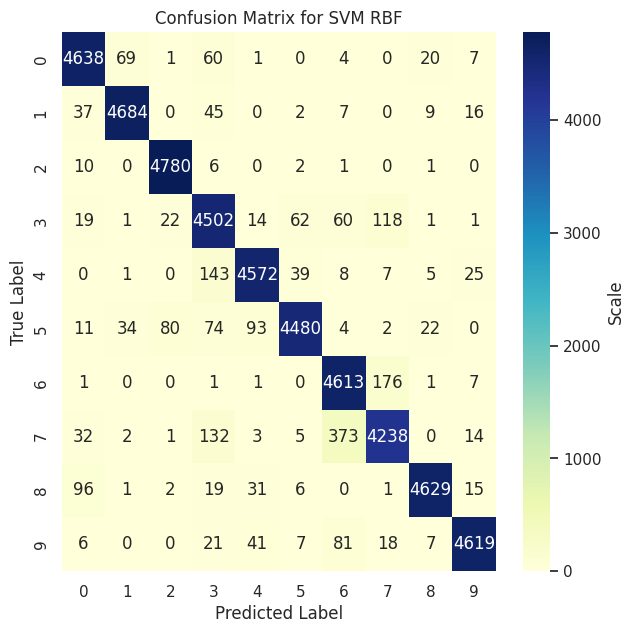

In [ ]:
p4_RBF_confusion_matrix, p4_RBF_F1_score = confusion_matrix_and_F1_score(p4_RBF_pred_labels, y4_test)

plot_confusion_matrix(p4_RBF_confusion_matrix, np.unique(y4_test), "SVM RBF")


### 3. Sigmoid: tanh(gamma*u'*v + coef0) 

In [ ]:
KERNEL = 3

problem4_Sigm = svm_problem(y4_train, x4_train)
# print("Accuracy for Training")
param4_Sigm = svm_parameter("-t 3 -g 0.008 -c 2")
model4_Sigm = svm_train(problem4_Sigm, param4_Sigm)

In [ ]:
print("Training Accuracy")
p4_Sigm_pred_labels, p4_Sigm_acc_train, vals4 = svm_predict(y4_train, x4_train, model4_Sigm)


Training Accuracy
Accuracy = 97.1583% (11659/12000) (classification)


In [ ]:
print("Testing Accuracy")
p4_Sigm_pred_labels, p4_Sigm_acc_train, vals4 = svm_predict(y4_test, x4_test, model4_Sigm)


Testing Accuracy
Accuracy = 94.0938% (45165/48000) (classification)


### Confusion Matrix

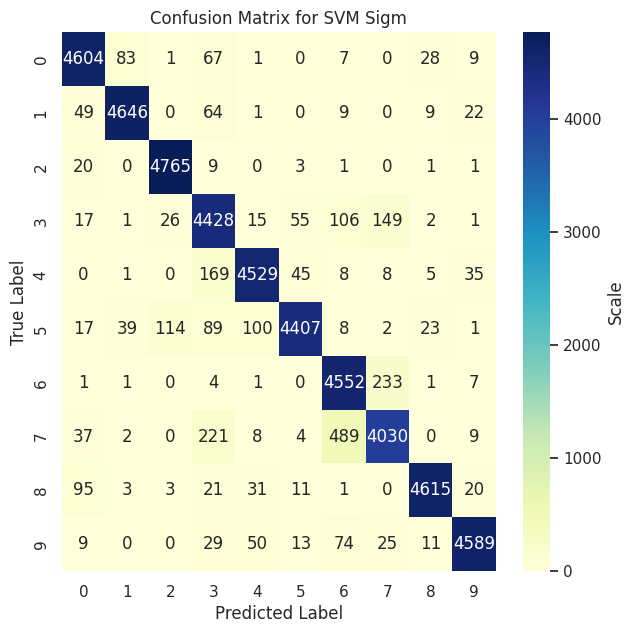

In [ ]:
p4_Sigm_confusion_matrix, p4_Sigm_F1_score = confusion_matrix_and_F1_score(p4_Sigm_pred_labels, y4_test)

plot_confusion_matrix(p4_Sigm_confusion_matrix, np.unique(y4_test), "SVM Sigm")


### F1 Scores

In [ ]:
P4_F1_score = [["Polynomial",p4_poly_F1_score],["RBF",p4_RBF_F1_score],["Sigmoid",p4_Sigm_F1_score]]
headers = [" ", "F1_scores"]
print(tabulate(P4_F1_score, headers, tablefmt="fancy_grid"))

╒════════════╤════════════════════════════════════════════════════════════════════╕
│            │ F1_scores                                                          │
╞════════════╪════════════════════════════════════════════════════════════════════╡
│ Polynomial │ [0.9598099  0.97108258 0.9860494  0.93488324 0.95577421 0.94220703 │
│            │  0.94030457 0.92265252 0.96042667 0.95866915]                      │
├────────────┼────────────────────────────────────────────────────────────────────┤
│ RBF        │ [0.96124352 0.97664721 0.98699153 0.91849434 0.95688573 0.95288738 │
│            │  0.927143   0.90555556 0.97503949 0.97201178]                      │
├────────────┼────────────────────────────────────────────────────────────────────┤
│ Sigmoid    │ [0.95429578 0.97034252 0.9815635  0.89445511 0.94987416 0.9438852  │
│            │  0.90542019 0.87163404 0.97209057 0.96671582]                      │
╘════════════╧══════════════════════════════════════════════════════════════

### For P5 (Assignment 1)

### 1. Polynomial: (gamma*u'*v + coef0)^degree

In [ ]:
KERNEL = 1

problem5_poly = svm_problem(y5_train, x5_train)
# print("Accuracy for Training")
param5_poly = svm_parameter("-t 1 -g 2.8 -c 2")
model5_poly = svm_train(problem5_poly, param5_poly)

In [ ]:
print("Training Accuracy")
p5_poly_pred_labels, p5_poly_acc_train, vals5 = svm_predict(y5_train, x5_train, model5_poly)


Training Accuracy
Accuracy = 96.575% (11589/12000) (classification)


In [ ]:
print("Testing Accuracy")
p5_poly_pred_labels, p5_poly_acc_test, vals5 = svm_predict(y5_test, x5_test, model5_poly)


Testing Accuracy
Accuracy = 93.1104% (44693/48000) (classification)


### Confusion Matrix

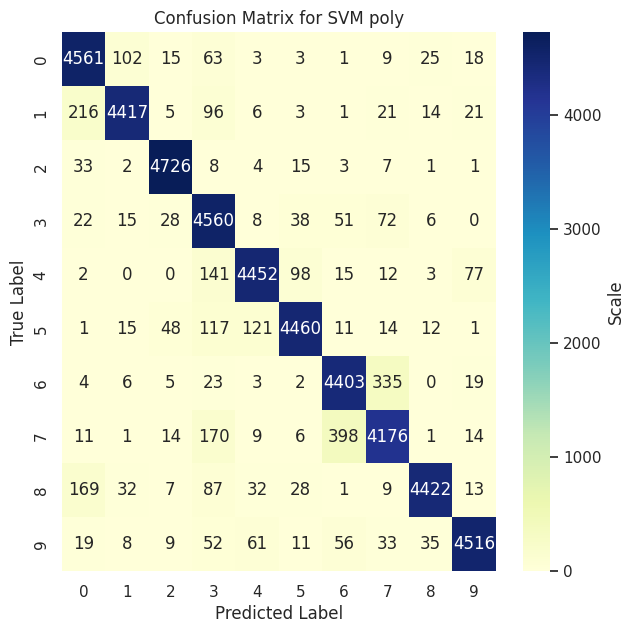

In [ ]:
p5_poly_confusion_matrix, p5_poly_F1_score = confusion_matrix_and_F1_score(p5_poly_pred_labels, y5_test)

plot_confusion_matrix(p5_poly_confusion_matrix, np.unique(y5_test), "SVM poly")


### 2. Radial Basis Function: exp(-gamma*|u-v|^2)

In [ ]:
KERNEL = 2

problem5_RBF = svm_problem(y5_train, x5_train)
# print("Accuracy for Training")
param5_RBF = svm_parameter("-t 2 -g 3 -c 2")
model5_RBF = svm_train(problem5_RBF, param5_RBF)

In [ ]:
print("Training Accuracy")
p5_RBF_pred_labels, p5_RBF_acc_train, vals5 = svm_predict(y5_train, x5_train, model5_RBF)


Training Accuracy
Accuracy = 95.6417% (11477/12000) (classification)


In [ ]:
print("Testing Accuracy")
p5_RBF_pred_labels, p5_RBF_acc_test, vals5 = svm_predict(y5_test, x5_test, model5_RBF)


Testing Accuracy
Accuracy = 93.4083% (44836/48000) (classification)


### Confusion Matrix

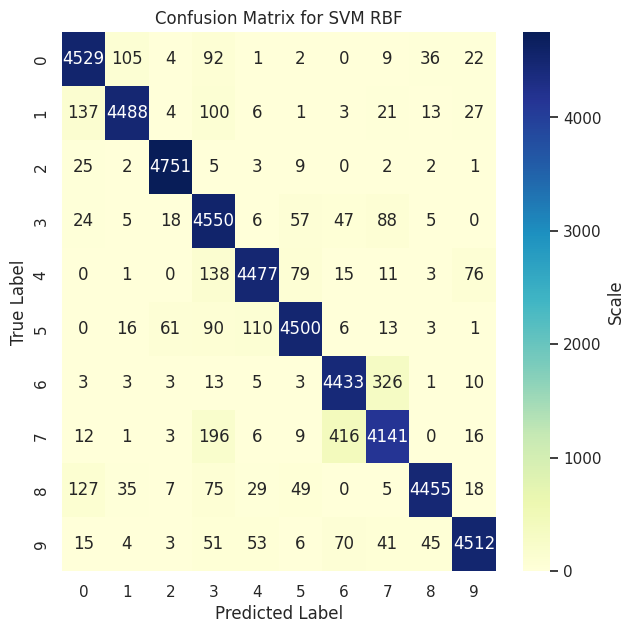

In [ ]:
p5_RBF_confusion_matrix, p5_RBF_F1_score = confusion_matrix_and_F1_score(p5_RBF_pred_labels, y5_test)

plot_confusion_matrix(p5_RBF_confusion_matrix, np.unique(y5_test), "SVM RBF")


### 3. Sigmoid: tanh(gamma*u'*v + coef0) 

In [ ]:
KERNEL = 3

problem5_Sigm = svm_problem(y5_train, x5_train)
# print("Accuracy for Training")
param5_Sigm = svm_parameter("-t 3 -g 0.205 -c 3")
model5_Sigm = svm_train(problem5_Sigm, param5_Sigm)

In [ ]:
print("Training Accuracy")
p5_Sigm_pred_labels, p5_Sigm_acc_train, vals5 = svm_predict(y5_train, x5_train, model5_Sigm)


Training Accuracy
Accuracy = 90.4833% (10858/12000) (classification)


In [ ]:
print("Testing Accuracy")
p5_Sigm_pred_labels, p5_Sigm_acc_test, vals5 = svm_predict(y5_test, x5_test, model5_Sigm)


Testing Accuracy
Accuracy = 89.4458% (42934/48000) (classification)


### Confusion Matrix

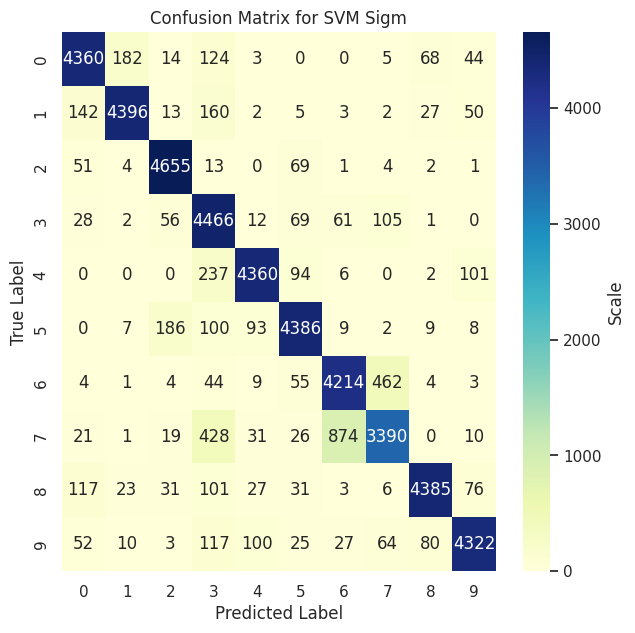

In [ ]:
p5_Sigm_confusion_matrix, p5_Sigm_F1_score = confusion_matrix_and_F1_score(p5_Sigm_pred_labels, y5_test)

plot_confusion_matrix(p5_Sigm_confusion_matrix, np.unique(y5_test), "SVM Sigm")


F1 Scores

In [ ]:
P5_F1_score = [["Polynomial",p5_poly_F1_score],["RBF",p5_RBF_F1_score],["Sigmoid",p5_Sigm_F1_score]]
headers = [" ", "F1_scores"]
print(tabulate(P5_F1_score, headers, tablefmt="fancy_grid"))

╒════════════╤════════════════════════════════════════════════════════════════════╕
│            │ F1_scores                                                          │
╞════════════╪════════════════════════════════════════════════════════════════════╡
│ Polynomial │ [0.92722098 0.93998723 0.97877188 0.901453   0.93736183 0.94251902 │
│            │  0.90410678 0.88026981 0.94902887 0.95274262]                      │
├────────────┼────────────────────────────────────────────────────────────────────┤
│ RBF        │ [0.93651778 0.94883721 0.98425523 0.90009891 0.94292334 0.94587493 │
│            │  0.90561798 0.87575341 0.95161807 0.9515976 ]                      │
├────────────┼────────────────────────────────────────────────────────────────────┤
│ Sigmoid    │ [0.91070496 0.93273923 0.95184541 0.8434372  0.92402246 0.91757322 │
│            │  0.84296859 0.76696833 0.93516741 0.9181094 ]                      │
╘════════════╧══════════════════════════════════════════════════════════════

### Without Slack Formulation

### For P3 (Assignment 1)

### 1. Polynomial: (gamma*u'*v + coef0)^degree

In [ ]:
KERNEL = 1

problem3 = svm_problem(y3_train, x3_train)

param3 = svm_parameter("-t 1 -g 0.08 -c " + str(np.inf))
model3 = svm_train(problem3, param3)
p3_poly_pred_labels, p3_poly_acc_test, vals3 = svm_predict(y3_test, x3_test, model3)

Accuracy = 37.9273% (4172/11000) (classification)


In [ ]:
print("Training Accuracy: ")
p3_poly_pred_labels, p3_poly_acc_train, vals3 = svm_predict(y3_train, x3_train, model3)


Training Accuracy: 
Accuracy = 41.65% (1666/4000) (classification)


In [ ]:
print("Testing Accuracy: ")
p3_poly_pred_labels, p3_poly_acc_test, vals3 = svm_predict(y3_test, x3_test, model3)


Testing Accuracy: 
Accuracy = 37.9273% (4172/11000) (classification)


### Confusion Matrix

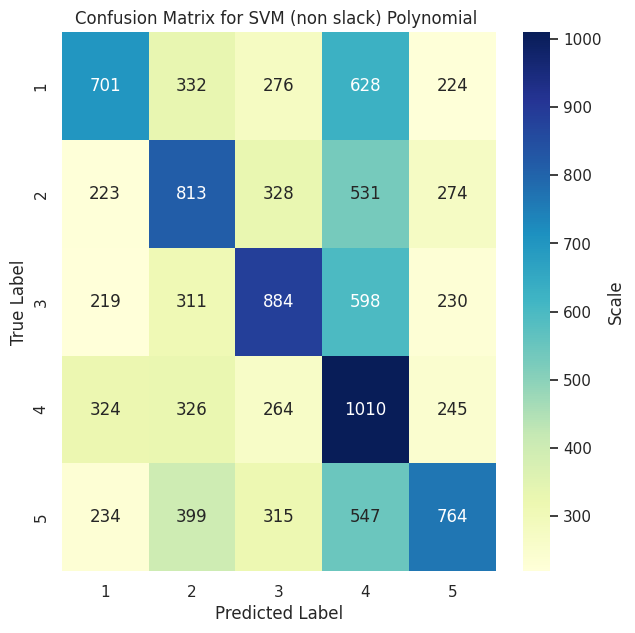

In [ ]:
p3_poly_confusion_matrix, p3_poly_F1_score = confusion_matrix_and_F1_score(p3_poly_pred_labels, y3_test)

plot_confusion_matrix(p3_poly_confusion_matrix, np.unique(y3_test), "SVM (non slack) Polynomial ")


### 2. Radial Basis Function: exp(-gamma*|u-v|^2)

In [ ]:
KERNEL = 2

problem3_RBF = svm_problem(y3_train, x3_train)
# print("Accuracy for Training")
param3_RBF = svm_parameter("-t 2 -g 0.008 -c "+ str(np.inf))
model3_RBF = svm_train(problem3_RBF, param3_RBF)
p3_RBF_pred_labels, p3_RBF_acc_test, vals3 = svm_predict(y3_test, x3_test, model3_RBF)
print(p3_RBF_acc_test)

Accuracy = 43.2% (4752/11000) (classification)
(43.2, 3.1792727272727275, 0.06243576792006738)


In [ ]:
print("Training Accuracy: ")
p3_RBF_pred_labels, p3_RBF_acc_train, vals3 = svm_predict(y3_train, x3_train, model3_RBF)


Training Accuracy: 
Accuracy = 98.95% (3958/4000) (classification)


In [ ]:
print("Testing Accuracy: ")
p3_RBF_pred_labels, p3_RBF_acc_test, vals3 = svm_predict(y3_test, x3_test, model3_RBF)


Testing Accuracy: 
Accuracy = 43.2% (4752/11000) (classification)


### Confusion Matrix

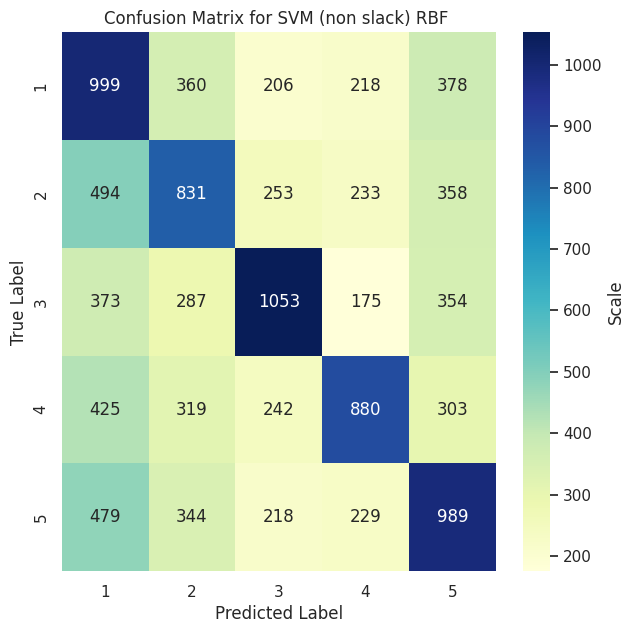

In [ ]:
p3_RBF_confusion_matrix, p3_RBF_F1_score = confusion_matrix_and_F1_score(p3_RBF_pred_labels, y3_test)

plot_confusion_matrix(p3_RBF_confusion_matrix, np.unique(y3_test), "SVM (non slack) RBF ")


### 3. Sigmoid: tanh(gamma*u'*v + coef0) 

In [ ]:
KERNEL = 3

problem3_Sigm = svm_problem(y3_train, x3_train)
# print("Accuracy for Training")
param3_Sigm = svm_parameter("-t 3 -g 0.008 -c "+ str(np.inf))
model3_Sigm = svm_train(problem3_Sigm, param3_Sigm)

In [ ]:
print("Training Accuracy: ")
p3_Sigm_pred_labels, p3_Sigm_acc_train, vals3 = svm_predict(y3_train, x3_train, model3_Sigm)


Training Accuracy: 
Accuracy = 23.15% (926/4000) (classification)


In [ ]:
print("Testing Accuracy: ")
p3_Sigm_pred_labels, p3_Sigm_acc_test, vals3 = svm_predict(y3_test, x3_test, model3_Sigm)


Testing Accuracy: 
Accuracy = 22.4727% (2472/11000) (classification)


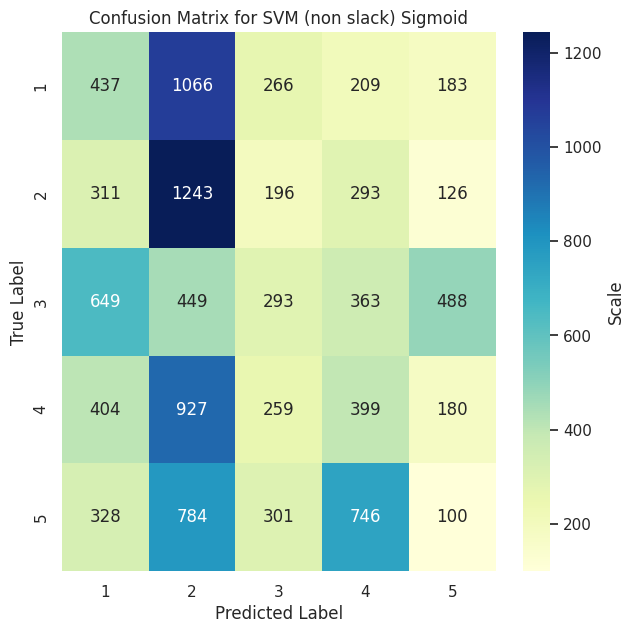

In [ ]:
p3_Sigm_confusion_matrix, p3_Sigm_F1_score = confusion_matrix_and_F1_score(p3_Sigm_pred_labels, y3_test)

plot_confusion_matrix(p3_Sigm_confusion_matrix, np.unique(y3_test), "SVM (non slack) Sigmoid")


### F1 Scores

In [ ]:
P3_F1_score = [["Polynomial",p3_poly_F1_score],["RBF",p3_RBF_F1_score],["Sigmoid",p3_Sigm_F1_score]]
headers = [" ", "F1_scores"]
print(tabulate(P3_F1_score, headers, tablefmt="fancy_grid"))

╒════════════╤══════════════════════════════════════════════════════════╕
│            │ F1_scores                                                │
╞════════════╪══════════════════════════════════════════════════════════╡
│ Polynomial │ [0.36302434 0.3737931  0.41030401 0.36841145 0.38238238] │
├────────────┼──────────────────────────────────────────────────────────┤
│ RBF        │ [0.40519164 0.38561485 0.4997627  0.45081967 0.42620125] │
├────────────┼──────────────────────────────────────────────────────────┤
│ Sigmoid    │ [0.2037296  0.37451039 0.16474557 0.19095477 0.05995204] │
╘════════════╧══════════════════════════════════════════════════════════╛


### For P4 (Assignment 1)

In [ ]:
unique_labels = np.unique(y4_train)

### 1. Polynomial: (gamma*u'*v + coef0)^degree

In [ ]:
KERNEL = 1

problem4_poly = svm_problem(y4_train, x4_train)
# print("Accuracy for Training")
param4_poly = svm_parameter("-t 1 -g 0.1 -c "+ str(np.inf))
model4_poly = svm_train(problem4_poly, param4_poly)

In [ ]:
print("Training Accuracy: ")
p4_poly_pred_labels, p4_poly_acc_train, vals4 = svm_predict(y4_train, x4_train, model4_poly)


Training Accuracy: 
Accuracy = 100% (12000/12000) (classification)


In [ ]:
print("Testing Accuracy: ")
p4_poly_pred_labels, p4_poly_acc_test, vals4 = svm_predict(y4_test, x4_test, model4_poly)



Testing Accuracy: 
Accuracy = 95.3229% (45755/48000) (classification)


### Confusion Matrix

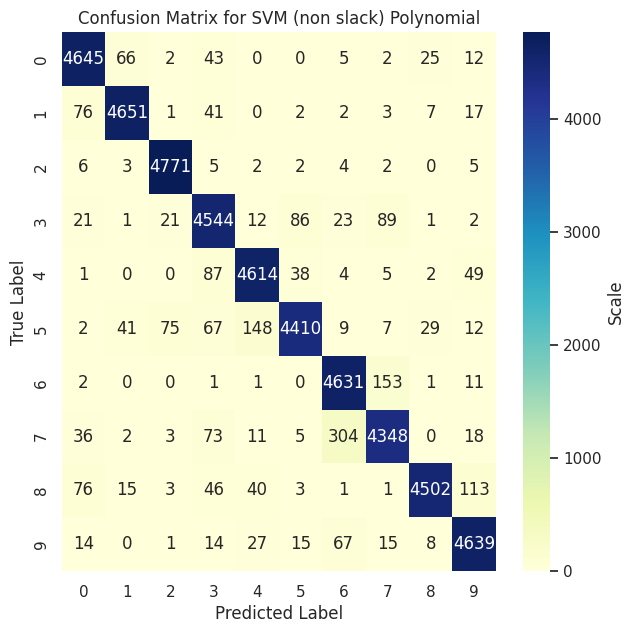

In [ ]:
p4_poly_confusion_matrix, p4_poly_F1_score = confusion_matrix_and_F1_score(p4_poly_pred_labels, y4_test)

plot_confusion_matrix(p4_poly_confusion_matrix, np.unique(y4_test), "SVM (non slack) Polynomial")


### 2. Radial Basis Function: exp(-gamma*|u-v|^2)

In [ ]:
KERNEL = 2

problem4_RBF = svm_problem(y4_train, x4_train)
# print("Accuracy for Training")
param4_RBF = svm_parameter("-t 2 -g 0.008 -c "+str(np.inf))
model4_RBF = svm_train(problem4_RBF, param4_RBF)

In [ ]:
print("Training Accuracy: ")
p4_RBF_pred_labels, p4_RBF_acc_train, vals4 = svm_predict(y4_train, x4_train, model4_RBF)


Training Accuracy: 
Accuracy = 100% (12000/12000) (classification)


In [ ]:
print("Testing Accuracy: ")
p4_RBF_pred_labels, p4_RBF_acc_test, vals4 = svm_predict(y4_test, x4_test, model4_RBF)


Testing Accuracy: 
Accuracy = 95.1292% (45662/48000) (classification)


### Confusion Matrix

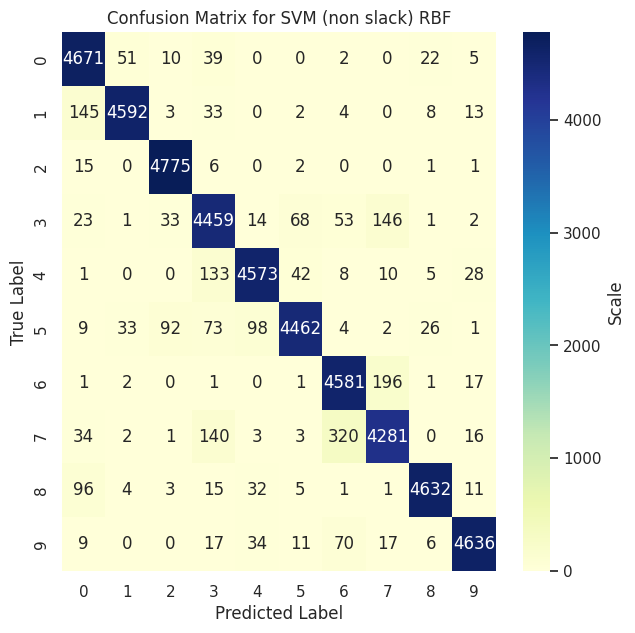

In [ ]:
p4_RBF_confusion_matrix, p4_RBF_F1_score = confusion_matrix_and_F1_score(p4_RBF_pred_labels, y4_test)

plot_confusion_matrix(p4_RBF_confusion_matrix, np.unique(y4_test), "SVM (non slack) RBF")


### 3. Sigmoid: tanh(gamma * u' * v + coef0)  

In [ ]:
KERNEL = 3

problem4_Sigm = svm_problem(y4_train, x4_train)
# print("Accuracy for Training")
param4_Sigm = svm_parameter("-t 3 -g 0.008 -c "+str(np.inf))
model4_Sigm = svm_train(problem4_Sigm, param4_Sigm)

In [ ]:
print("Training Accuracy: ")
p4_Sigm_pred_labels, p4_Sigm_acc_train, vals4 = svm_predict(y4_train, x4_train, model4_Sigm)


Training Accuracy: 
Accuracy = 93.7667% (11252/12000) (classification)


In [ ]:
print("Testing Accuracy: ")
p4_Sigm_pred_labels, p4_Sigm_acc_test, vals4 = svm_predict(y4_test, x4_test, model4_Sigm)


Testing Accuracy: 
Accuracy = 87.4479% (41975/48000) (classification)


### Confusion Matrix

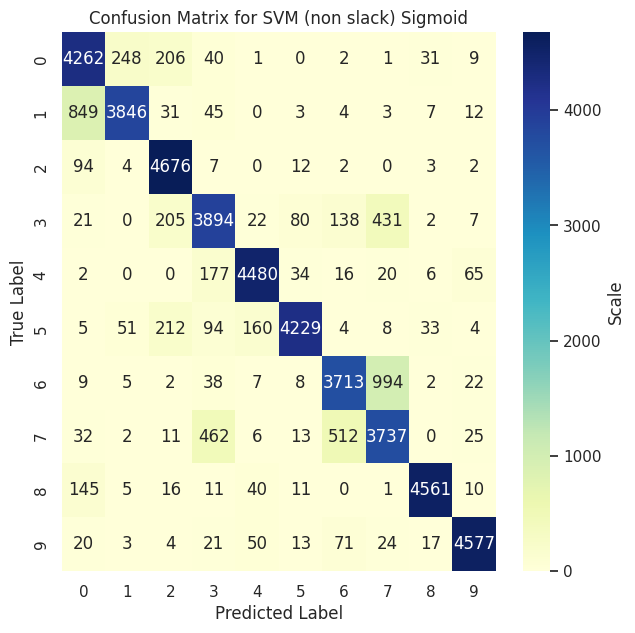

In [ ]:
p4_Sigm_confusion_matrix, p4_Sigm_F1_score = confusion_matrix_and_F1_score(p4_Sigm_pred_labels, y4_test)

plot_confusion_matrix(p4_Sigm_confusion_matrix, np.unique(y4_test), "SVM (non slack) Sigmoid")


### F1 Scores

In [ ]:
P4_F1_score = [["Polynomial",p4_poly_F1_score],["RBF",p4_RBF_F1_score],["Sigmoid",p4_Sigm_F1_score]]
headers = [" ", "F1_scores"]
print(tabulate(P4_F1_score, headers, tablefmt="fancy_grid"))

╒════════════╤════════════════════════════════════════════════════════════════════╕
│            │ F1_scores                                                          │
╞════════════╪════════════════════════════════════════════════════════════════════╡
│ Polynomial │ [0.9598099  0.97108258 0.9860494  0.93488324 0.95577421 0.94220703 │
│            │  0.94030457 0.92265252 0.96042667 0.95866915]                      │
├────────────┼────────────────────────────────────────────────────────────────────┤
│ RBF        │ [0.95287638 0.96826568 0.98281363 0.91786744 0.95729537 0.94976586 │
│            │  0.93081378 0.90574421 0.97495264 0.9729276 ]                      │
├────────────┼────────────────────────────────────────────────────────────────────┤
│ Sigmoid    │ [0.83250317 0.85809906 0.92020073 0.81218062 0.93665064 0.91904814 │
│            │  0.80177068 0.74598263 0.96406679 0.96024337]                      │
╘════════════╧══════════════════════════════════════════════════════════════

### For P5 (Assignment 1)

### 1. Polynomial: (gamma * u' * v + coef0)^degree

In [ ]:
KERNEL = 1

problem5_poly = svm_problem(y5_train, x5_train)
# print("Accuracy for Training")
param5_poly = svm_parameter("-t 1 -g 2.8 -c "+str(np.inf))
model5_poly = svm_train(problem5_poly, param5_poly)

In [ ]:
print("Training Accuracy: ")
p5_poly_pred_labels, p5_poly_acc_train, vals5 = svm_predict(y5_train, x5_train, model5_poly)


Training Accuracy: 
Accuracy = 96.2167% (11546/12000) (classification)


In [ ]:
print("Testing Accuracy: ")
p5_poly_pred_labels, p5_poly_acc_test, vals5 = svm_predict(y5_test, x5_test, model5_poly)


Testing Accuracy: 
Accuracy = 88.8354% (42641/48000) (classification)


### Confusion Matrix

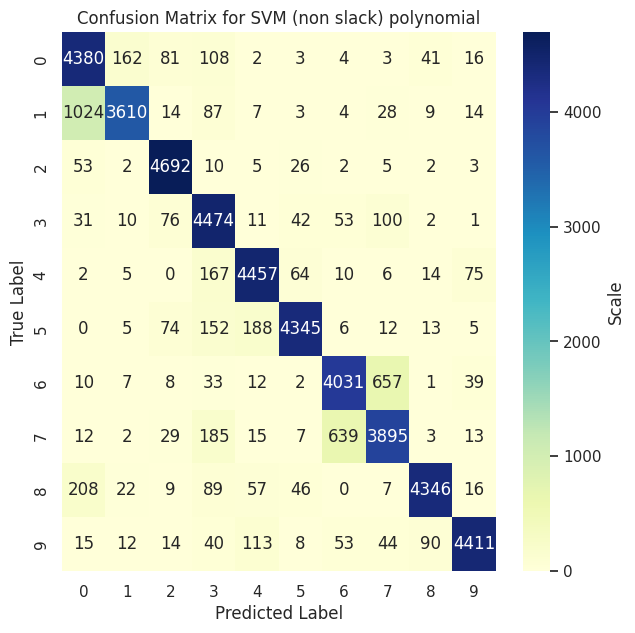

In [ ]:
p5_poly_confusion_matrix, p5_poly_F1_score = confusion_matrix_and_F1_score(p5_poly_pred_labels, y5_test)

plot_confusion_matrix(p5_poly_confusion_matrix, np.unique(y5_test), "SVM (non slack) polynomial")


### 2. Radial Basis Function: exp(-gamma*|u-v|^2)

In [ ]:
KERNEL = 2

problem5_RBF = svm_problem(y5_train, x5_train)
# print("Accuracy for Training")
param5_RBF = svm_parameter("-t 2 -g 1.5 -c "+ str(np.inf))
model5_RBF = svm_train(problem5_RBF, param5_RBF)

In [ ]:
print("Training Accuracy: ")
p5_RBF_pred_labels, p5_RBF_acc_train, vals5 = svm_predict(y5_train, x5_train, model5_RBF)


Training Accuracy: 
Accuracy = 100% (12000/12000) (classification)


In [ ]:
print("Testing Accuracy: ")
p5_RBF_pred_labels, p5_RBF_acc_test, vals5 = svm_predict(y5_test, x5_test, model5_RBF)


Testing Accuracy: 
Accuracy = 90.8063% (43587/48000) (classification)


### Confusion Matrix

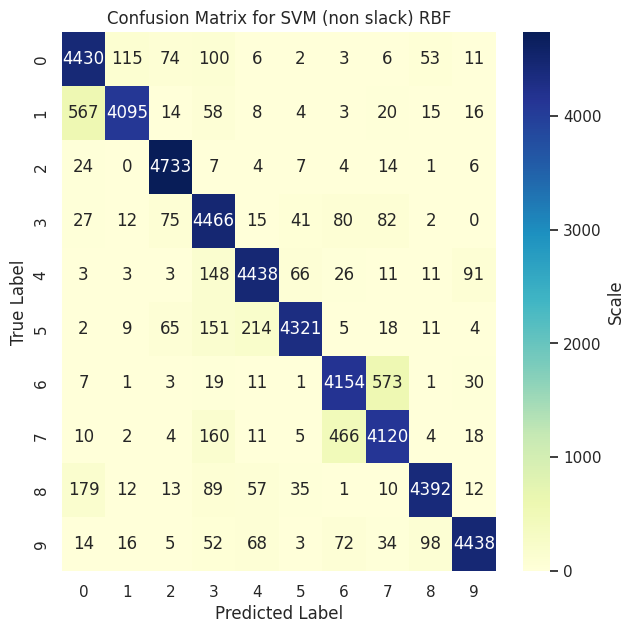

In [ ]:
p5_RBF_confusion_matrix, p5_RBF_F1_score = confusion_matrix_and_F1_score(p5_RBF_pred_labels, y5_test)

plot_confusion_matrix(p5_RBF_confusion_matrix, np.unique(y5_test), "SVM (non slack) RBF")


### 3. Sigmoid: tanh(gamma*u'*v + coef0) 

In [ ]:
KERNEL = 3

problem5_Sigm = svm_problem(y5_train, x5_train)
# print("Accuracy for Training")
param5_Sigm = svm_parameter("-t 3 -g 0.1 -c "+ str(np.inf))
model5_Sigm = svm_train(problem5_Sigm, param5_Sigm)

In [ ]:
print("Training Accuracy: ")
p5_Sigm_pred_labels, p5_Sigm_acc_train, vals5 = svm_predict(y5_train, x5_train, model5_Sigm)


Training Accuracy: 
Accuracy = 48.2083% (5785/12000) (classification)


In [ ]:
print("Testing Accuracy: ")
p5_Sigm_pred_labels, p5_Sigm_acc_test, vals5 = svm_predict(y5_test, x5_test, model5_Sigm)


Testing Accuracy: 
Accuracy = 47.9104% (22997/48000) (classification)


### Confusion Matrix

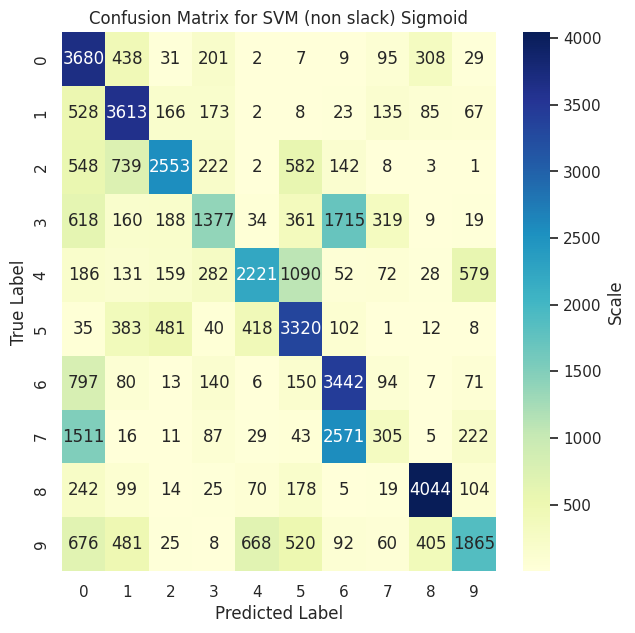

In [ ]:
p5_Sigm_confusion_matrix, p5_Sigm_F1_score = confusion_matrix_and_F1_score(p5_Sigm_pred_labels, y5_test)

plot_confusion_matrix(p5_Sigm_confusion_matrix, np.unique(y5_test), "SVM (non slack) Sigmoid")


### F1 Scores

In [ ]:
P5_F1_score = [["Polynomial",p5_poly_F1_score],["RBF",p5_RBF_F1_score],["Sigmoid",p5_Sigm_F1_score]]
headers = [" ", "F1_scores"]
print(tabulate(P5_F1_score, headers, tablefmt="fancy_grid"))

╒════════════╤════════════════════════════════════════════════════════════════════╕
│            │ F1_scores                                                          │
╞════════════╪════════════════════════════════════════════════════════════════════╡
│ Polynomial │ [0.831514   0.8359384  0.95784424 0.88201084 0.92210613 0.92980954 │
│            │  0.83961675 0.81510934 0.93251797 0.93921005]                      │
├────────────┼────────────────────────────────────────────────────────────────────┤
│ RBF        │ [0.88045315 0.9034749  0.96700378 0.88875622 0.92151163 0.93074852 │
│            │  0.86415644 0.85053675 0.93566255 0.94165075]                      │
├────────────┼────────────────────────────────────────────────────────────────────┤
│ Sigmoid    │ [0.54034212 0.66051188 0.60490463 0.37443916 0.53829375 0.60041595 │
│            │  0.53145989 0.10324983 0.83329899 0.48036059]                      │
╘════════════╧══════════════════════════════════════════════════════════════

# Problem 2 (FLDA)

In [ ]:
class FLDA:
    def __init__(self):
        self.num_classes = None
        self.parameters = None
        self.first_label = 0
        self.dimension = 0
        

    def compute_Sb_Sw(self,X,y):
      self.means = []
      Sb = np.zeros((self.dimension,self.dimension))
      Sw = np.zeros((self.dimension,self.dimension))
      mean = np.mean(X,axis = 0)
      unique , class_count = np.unique(y,return_counts = True)  
      for i in range(self.num_classes):
        self.means.append(np.mean(X[y == i + self.first_label],axis = 0))
        Sb += class_count[i] * (np.array([self.means[i]-mean]).T@np.array([self.means[i]-mean]))

      for j in range(len(X)):
        x = np.array([X[j]])
        m = np.array([self.means[(y[j]-self.first_label).astype(int)]])
        Sw += (x-m).T@(x-m)

      return Sb,Sw 
      
    def compute_w(self,X,y):
      Sb , Sw = self.compute_Sb_Sw(X,y)
      e_val , e_vec =  np.linalg.eig(np.linalg.pinv(Sw)@Sb)
      idxs = np.argsort(e_val)[::-1][:self.num_classes-1]
      self.parameters = e_vec[:,idxs].T

    def project(self,X):
      return X @ self.parameters.T

    def fit(self,train_data):
      x = train_data[:,0:-1]
      y = train_data[:,-1]
      unique = np.unique(y,return_counts = False)
      self.first_label = np.min(y)
      self.num_classes = len(unique)
      self.dimension = x.shape[1]
      self.compute_w(x, y)

    def predict(self,test_data):

      projected_means = np.array(self.means)@self.parameters.T
      projected_data = test_data @ self.parameters.T
      pred_label = np.zeros(len(test_data))
      for i in range(len(test_data)):
          dist = np.sum((projected_means - projected_data[i])**2 , axis = 1)
          pred_label[i] = np.argmin(dist) + self.first_label

      return pred_label




### Function for Confusion Matrix and F1 Score

In [ ]:
# Plotting Confusion Matrix
def plot_confusion_matrix(data, labels, classifier):
    import seaborn
    seaborn.set(color_codes=True)
    plt.figure(1, figsize=(7,7))
 
    plt.title("Confusion Matrix for {}".format(classifier))
 
    seaborn.set(font_scale=1)
    ax = seaborn.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'}, fmt='g')
 
    ax.set_xticklabels(labels.astype(int))
    ax.set_yticklabels(labels.astype(int))
 
    ax.set(ylabel="True Label", xlabel="Predicted Label")

    plt.show()

# calculating Confusion Matrix and F1 Scores
def confusion_matrix_and_F1_score(y_pred,y_true):
  num_classes = len(np.unique(y_true))
  first_label = int(np.min(y_true))

  # initialize confusion matrix with zeros
  confusion_matrix = np.zeros((num_classes+first_label, num_classes+first_label))

  # loop over all samples
  for i in range(len(y_true)):
      # increment count of true-predicted label pair
      confusion_matrix[int(y_true[i]), int(y_pred[i])] += 1

  confusion_matrix = confusion_matrix[first_label:,first_label:]
  #plot_confusion_matrix(confusion_matrix, np.unique(y_true))


  # calculate precision, recall, and F1 score for each class
  class_precision = np.zeros(num_classes)
  class_recall = np.zeros(num_classes)
  class_f1 = np.zeros(num_classes)
  for i in range(num_classes):
      class_precision[i] = confusion_matrix[i,i] / np.sum(confusion_matrix[:,i])
      class_recall[i] = confusion_matrix[i,i] / np.sum(confusion_matrix[i,:])
      class_f1[i] = 2 * (class_precision[i] * class_recall[i]) / (class_precision[i] + class_recall[i])
  return confusion_matrix , class_f1



### P3

In [ ]:
# Training Data
p3_train = np.genfromtxt("/content/drive/MyDrive/PRNN/p3_train.csv", delimiter=",", dtype=float)

# Testing Data
p3_test = np.genfromtxt("/content/drive/MyDrive/PRNN/p3_test.csv", delimiter=",", dtype=float)

# splitting 
x3_train, y3_train = p3_train[:, 0:-1], p3_train[:, -1]
x3_test, y3_test = p3_test[:, 0:-1], p3_test[:, -1]


In [ ]:
obj = FLDA()

# Training
obj.fit(p3_train)

# Testing
p3_FLDA_pred = obj.predict(x3_test)

# Results
print(f"Accuracy = {np.mean(p3_FLDA_pred==y3_test)*100}%")

Accuracy = 57.41333333333334%


### Confusion Matrix

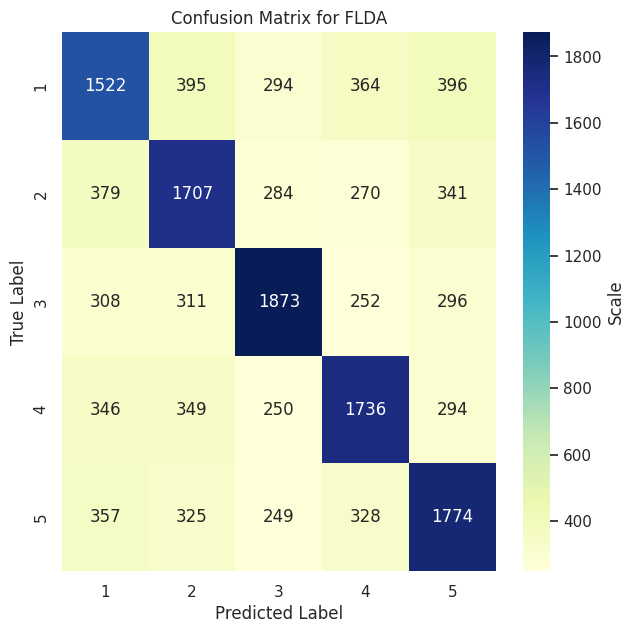

In [ ]:
p3_FLDA_confusion_matrix, p3_FLDA_F1_score =  confusion_matrix_and_F1_score(p3_FLDA_pred, y3_test)
plot_confusion_matrix(p3_FLDA_confusion_matrix, np.unique(y3_test), "FLDA" )

### P4

### Importing Data

In [ ]:
# Importing Data
p4 = np.genfromtxt("/content/drive/MyDrive/PRNN/p4_data.csv", delimiter=",", dtype=float)

# Normalizing
p4_normalized = p4.copy()
p4_normalized[:,0:-1] = p4_normalized[:,0:-1]/255

# Splitting 
p4_train_30_70 = p4_normalized[0:18000,:]
x4_train, y4_train = p4_train_30_70[:, 0:-1] , p4_train_30_70[:, -1]


p4_test_30_70 = p4_normalized[18000:, :]
x4_test_30_70, y4_test_30_70 = p4_test_30_70[:, 0:-1], p4_test_30_70[:, -1]


p4_train_50_50 = p4_normalized[0:30000,:]
x4_train_50_50, y4_train_50_50 = p4_train_50_50[:, 0:-1] , p4_train_50_50[:, -1]

p4_test_50_50 = p4_normalized[30000:,:]
x4_test_50_50, y4_test_50_50 = p4_test_50_50[:, 0:-1], p4_test_50_50[:, -1]

### on 30-70 split

In [ ]:
obj = FLDA()

# Training
obj.fit(p4_train_30_70)

# Testing
p4_FLDA_pred_30_70 = obj.predict(x4_test_30_70)

# Results
print(f"Accuracy = {np.mean(p4_FLDA_pred_30_70==y4_test_30_70)*100}%")

Accuracy = 85.19761904761904%


### Confusion Matrix

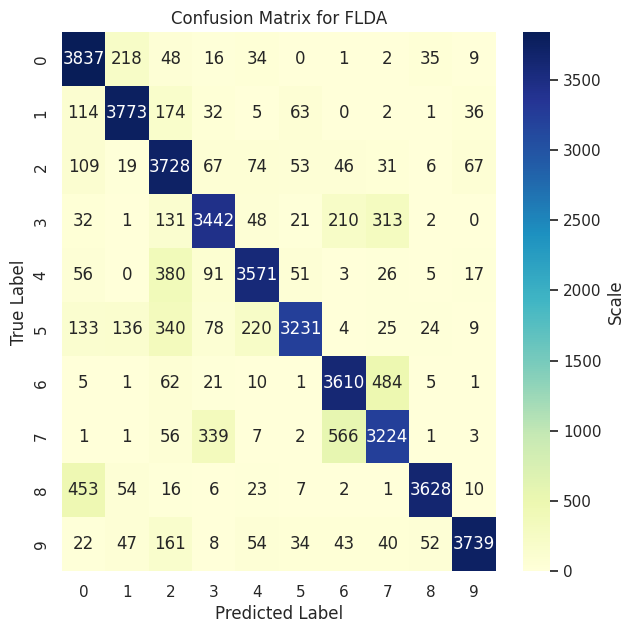

In [ ]:
p4_FLDA_confusion_matrix_30_70, p4_FLDA_F1_score_30_70 =  confusion_matrix_and_F1_score(p4_FLDA_pred_30_70, y4_test_30_70)
plot_confusion_matrix(p4_FLDA_confusion_matrix_30_70, np.unique(y4_test_30_70), "FLDA" )

### on 50-50 split

In [ ]:
obj = FLDA()

# Training
obj.fit(p4_train_50_50)

# Testing
p4_FLDA_pred_50_50 = obj.predict(x4_test_50_50)

# Results
print(f"Accuracy = {np.mean(p4_FLDA_pred_50_50==y4_test_50_50)*100}%")

Accuracy = 70.49%


### Confusion Matrix

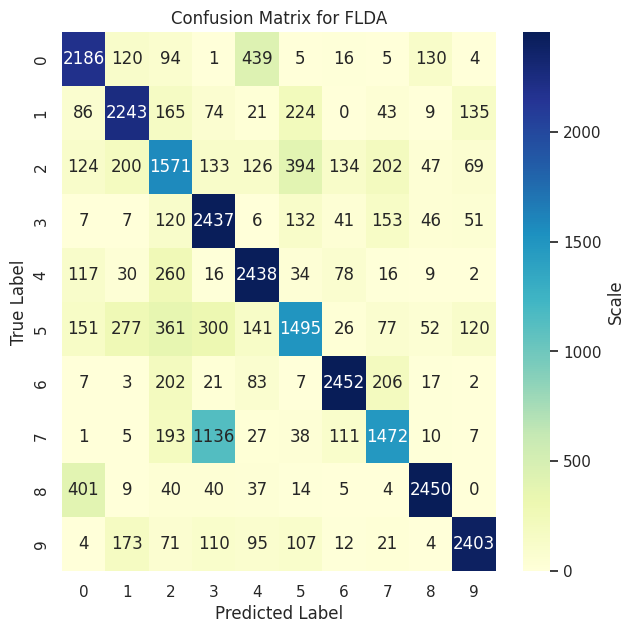

In [ ]:
p4_FLDA_confusion_matrix_50_50, p4_FLDA_F1_score_50_50 =  confusion_matrix_and_F1_score(p4_FLDA_pred_50_50, y4_test_50_50)
plot_confusion_matrix(p4_FLDA_confusion_matrix_50_50, np.unique(y4_test_50_50), "FLDA" )

## P5

### Importing Data 

In [ ]:
p5 = np.genfromtxt("/content/drive/MyDrive/PRNN/PCA_MNIST.csv", delimiter=",", dtype=float)
l = p5[1:,:][:,0]
t  =p5[1:,:][:,1:]
p5 = np.column_stack((t,l))

p5_normalized = p5.copy()
for i in range(10):
  p5_normalized[:,i] = (p5_normalized[:,i] - np.min(p5_normalized[:,i]))/(np.max(p5_normalized[:,i])-np.min(p5_normalized[:,i]))

In [ ]:
p5_train_30_70 = p5_normalized[0:18000,:]
x5_train_30_70, y5_train_30_70 = p5_train_30_70[:, 0:-1] , p5_train_30_70[:, -1]

p5_test_30_70 = p5_normalized[18000:,:]
x5_test_30_70, y5_test_30_70 = p5_test_30_70[:, 0:-1] , p5_test_30_70[:, -1]

p5_train_50_50 = p5_normalized[0:30000,:]
x5_train_50_50, y5_train_50_50 = p5_train_50_50[:, 0:-1] , p5_train_50_50[:, -1]

p5_test_50_50 = p5_normalized[30000:,:]
x5_test_50_50, y5_test_50_50 = p5_test_50_50[:, 0:-1] , p5_test_50_50[:, -1]

### on 30-70 split

In [ ]:
obj = FLDA()

# Training
obj.fit(p5_train_30_70)

# Testing
p5_FLDA_pred_30_70 = obj.predict(x5_test_30_70)

# Results
print(f"Accuracy = {np.mean(p5_FLDA_pred_30_70==y5_test_30_70)*100}%")

Accuracy = 84.25714285714285%


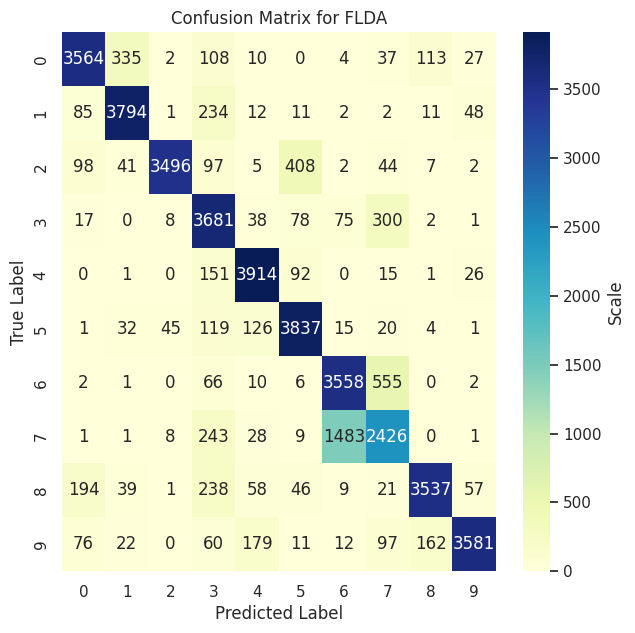

In [ ]:
p5_FLDA_confusion_matrix_30_70, p5_FLDA_F1_score_30_70 =  confusion_matrix_and_F1_score(p5_FLDA_pred_30_70, y5_test_30_70)
plot_confusion_matrix(p5_FLDA_confusion_matrix_30_70, np.unique(y5_test_30_70), "FLDA" )

### on 50-50 split

In [ ]:
obj = FLDA()

# Training
obj.fit(p5_train_50_50)

# Testing
p5_FLDA_pred_50_50 = obj.predict(x5_test_50_50)

# Results
print(f"Accuracy = {np.mean(p5_FLDA_pred_50_50==y5_test_50_50)*100}%")

Accuracy = 85.07666666666667%


### Confusion Matrix

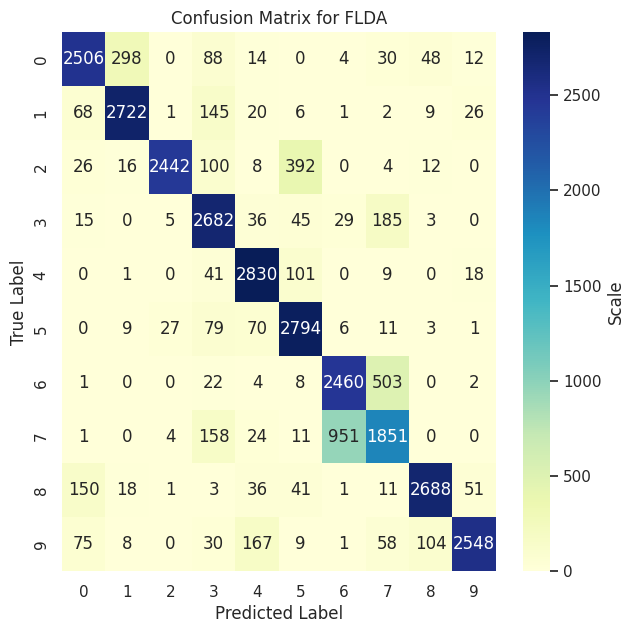

In [ ]:
p5_FLDA_confusion_matrix_50_50, p5_FLDA_F1_score_50_50 =  confusion_matrix_and_F1_score(p5_FLDA_pred_50_50, y5_test_50_50)
plot_confusion_matrix(p5_FLDA_confusion_matrix_50_50, np.unique(y5_test_50_50), "FLDA" )

## F1-Scores

In [ ]:
F1_score = [["P3",p3_FLDA_F1_score],["P4 (30-70)",p4_FLDA_F1_score_30_70],["P4 (50-50)",p4_FLDA_F1_score_50_50],["P5 (30-70)",p5_FLDA_F1_score_30_70],["P5 (50-50)",p5_FLDA_F1_score_50_50]]
headers = [" " ,"F1 Scores"]
print(tabulate(F1_score , headers, tablefmt="fancy_grid"))

╒════════════╤════════════════════════════════════════════════════════════════════╕
│            │ F1 Scores                                                          │
╞════════════╪════════════════════════════════════════════════════════════════════╡
│ P3         │ [0.51742308 0.5626236  0.62537563 0.58599156 0.57841539]           │
├────────────┼────────────────────────────────────────────────────────────────────┤
│ P4 (30-70) │ [0.85628208 0.89301775 0.8020654  0.82939759 0.86611691 0.84327287 │
│            │  0.83131836 0.77240057 0.91167232 0.92423681]                      │
├────────────┼────────────────────────────────────────────────────────────────────┤
│ P4 (50-50) │ [0.71860618 0.73940992 0.51703143 0.6706109  0.76033058 0.54862385 │
│            │  0.8347234  0.56626274 0.8486318  0.82962196]                      │
├────────────┼────────────────────────────────────────────────────────────────────┤
│ P5 (30-70) │ [0.86525856 0.89629105 0.90091483 0.80047842 0.91235431 0.882

## Accuracies

In [ ]:
Accuracy = [["P3",np.mean(p3_FLDA_pred==y3_test)*100],["P4 (30-70)",np.mean(p4_FLDA_pred_30_70==y4_test_30_70)*100],["P4 (50-50)",np.mean(p4_FLDA_pred_50_50==y4_test_50_50)*100],["P5 (30-70)",np.mean(p5_FLDA_pred_30_70==y5_test_30_70)*100],["P5 (50-50)",np.mean(p5_FLDA_pred_50_50==y5_test_50_50)*100]]
headers = [" " ,"Accuracies"]
print(tabulate(Accuracy , headers, tablefmt="fancy_grid"))

╒════════════╤══════════════╕
│            │   Accuracies │
╞════════════╪══════════════╡
│ P3         │      57.4133 │
├────────────┼──────────────┤
│ P4 (30-70) │      85.1976 │
├────────────┼──────────────┤
│ P4 (50-50) │      70.49   │
├────────────┼──────────────┤
│ P5 (30-70) │      84.2571 │
├────────────┼──────────────┤
│ P5 (50-50) │      85.0767 │
╘════════════╧══════════════╛


# Functions for Covolution and Correlation

In [ ]:
def correlation2D(image, kernel, mode='valid'):
    m, n = kernel.shape
    y, x = image.shape
    if mode == 'valid':
        y = y - m + 1
        x = x - n + 1
    elif mode == 'full':
        y = y + m - 1
        x = x + n - 1
        image = np.pad(image, ((m-1, m-1), (n-1, n-1)), mode='constant')
    result = np.zeros((y,x))
    for i in range(y):
        for j in range(x):
            result[i][j] = np.sum(image[i:i+m, j:j+n] * kernel)
    return result

def convolve2D(image, kernel, mode='valid'):
    m, n = kernel.shape
    y, x = image.shape
    if mode == 'valid':
        y = y - m + 1
        x = x - n + 1
    elif mode == 'full':
        y = y + m - 1
        x = x + n - 1
        image = np.pad(image, ((m-1, m-1), (n-1, n-1)), mode='constant')
    result = np.zeros((y,x))
    for i in range(y):
        for j in range(x):
            result[i][j] = np.sum(image[i:i+m, j:j+n] * kernel[::-1,::-1])
    return result

# Defining necessary classes required for Neural Networks

In [ ]:

# Dense layer
class Layer_Dense:

    def __init__(self, num_inputs, num_neurons,weight_regularizer_l1=0, weight_regularizer_l2=0,bias_regularizer_l1=0, bias_regularizer_l2=0):
        self.weights = 0.01 * np.random.randn(num_inputs, num_neurons)
        self.biases = np.zeros((1, num_neurons))
        self.weight_regularizer_l1 = weight_regularizer_l1
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l1 = bias_regularizer_l1
        self.bias_regularizer_l2 = bias_regularizer_l2

    def forward(self, inputs, training):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        if self.weight_regularizer_l1 > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dL1

        if self.weight_regularizer_l2 > 0:
            self.dweights += self.weight_regularizer_l2 * self.weights

        if self.bias_regularizer_l1 > 0:
            dL1 = np.ones_like(self.biases)
            dL1[self.biases < 0] = -1
            self.dbiases += self.bias_regularizer_l1 * dL1

        if self.bias_regularizer_l2 > 0:
            self.dbiases += self.bias_regularizer_l2 * self.biases

        self.dinputs = np.dot(dvalues, self.weights.T)

    def get_parameters(self):
        return self.weights, self.biases
        
# Convolution Layer

class Layer_Convolutional:

    def __init__(self, input_shape, kernel_size, depth,weight_regularizer_l1=0, weight_regularizer_l2=0,bias_regularizer_l1=0, bias_regularizer_l2=0):
        input_depth, input_height, input_width = input_shape
        self.depth = depth
        self.input_shape = input_shape
        self.input_depth = input_depth
        self.output_shape = (depth, input_height - kernel_size + 1, input_width - kernel_size + 1)
        self.kernels_shape = (depth, input_depth, kernel_size, kernel_size)
        self.weights = np.random.randn(*self.kernels_shape)
        self.biases = np.random.randn(*self.output_shape)
        self.weight_regularizer_l1 = weight_regularizer_l1
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l1 = bias_regularizer_l1
        self.bias_regularizer_l2 = bias_regularizer_l2

    def forward(self, inputs, training):
        self.inputs = inputs
        self.output = np.array([np.copy(self.biases)]*len(inputs))
        for k in range(len(inputs)):
          for i in range(self.depth):
              for j in range(self.input_depth):
                  self.output[k][i] += correlation2D(self.inputs[k][j], self.weights[i, j], "valid")

    def backward(self, dvalues):
        self.dweights = np.zeros(self.kernels_shape)
        self.dinputs = np.array([np.zeros(self.input_shape)]*len(self.inputs))
        self.dbiases = np.sum(dvalues, axis=0)

        for k in range(len(self.inputs)):
          for i in range(self.depth):
              for j in range(self.input_depth):
                  self.dweights[i, j] += correlation2D(self.inputs[k][j], dvalues[k][i], "valid")
                  self.dinputs[k][j] += convolve2D(dvalues[k][i], self.weights[i, j], "full")

        if self.weight_regularizer_l1 > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dL1

        if self.weight_regularizer_l2 > 0:
            self.dweights += self.weight_regularizer_l2 * self.weights

        if self.bias_regularizer_l1 > 0:
            dL1 = np.ones_like(self.biases)
            dL1[self.biases < 0] = -1
            self.dbiases += self.bias_regularizer_l1 * dL1

        if self.bias_regularizer_l2 > 0:
            self.dbiases += self.bias_regularizer_l2 * self.biases

# Max Pool Layer

class Layer_Max_Pooling:
    def __init__(self, input_shape, kernel_size, stride):
        input_depth, input_height, input_width = input_shape
        self.input_shape = input_shape
        self.input_depth = input_depth
        self.stride = stride
        self.output_shape = (input_depth, (input_height - kernel_size)//self.stride + 1, (input_width - kernel_size)//self.stride + 1)
        self.kernel_shape = (kernel_size, kernel_size)

    def forward(self, inputs, training):
        self.inputs = inputs
        self.output = np.array([np.zeros(self.output_shape)]*len(inputs))
        for data_idx in range(len(inputs)):
          for channel in range(self.output_shape[0]):
              for height in range(self.output_shape[1]):
                  for width in range(self.output_shape[2]):
                      self.output[data_idx][channel][height][width] = np.max(self.inputs[data_idx,channel, height * self.stride : height * self.stride + self.kernel_shape[0], width * self.stride : width * self.stride + self.kernel_shape[1]])
    
    def backward(self,dvalues):
      self.dinputs = np.zeros_like(self.inputs)
      for data_idx in range(len(self.inputs)):
        for channel in range(self.output_shape[0]):
            for height in range(self.output_shape[1]):
                for width in range(self.output_shape[2]):
                    window = self.inputs[data_idx,channel, height * self.stride : height * self.stride + self.kernel_shape[0], width * self.stride : width * self.stride + self.kernel_shape[1]]
                    t1, t2 = np.where(np.max(window) == window)
                    self.inputs[data_idx,channel, height * self.stride : height * self.stride + self.kernel_shape[0], width * self.stride : width * self.stride + self.kernel_shape[1]][t1,t2] = dvalues[data_idx,channel,height,width]     

# Flatten Layer

class Layer_Flatten():
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def forward(self, inputs, training):
        self.inputs = inputs
        self.output = np.reshape(inputs,(len(inputs),self.input_shape[0]*self.input_shape[1]*self.input_shape[2]))

    def backward(self, dvalues):
        self.dinputs = np.reshape(dvalues, (len(self.inputs),self.input_shape[0],self.input_shape[1],self.input_shape[2]))

# Dropout
class Layer_Dropout:

    def __init__(self, rate):
        self.rate = 1 - rate

    def forward(self, inputs, training):
        self.inputs = inputs
        if not training:
            self.output = inputs.copy()
            return

        self.binary_mask = np.random.binomial(1, self.rate, size=inputs.shape) / self.rate
        self.output = inputs * self.binary_mask

    def backward(self, dvalues):
        self.dinputs = dvalues * self.binary_mask


# Input Layer
class Layer_Input:

    def forward(self, inputs, training):
        self.output = inputs


# ReLU activation
class Activation_ReLU:

    def forward(self, inputs, training):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0

    def predictions(self, outputs):
        return outputs



# Softmax activation
class Activation_Softmax:

    def forward(self, inputs, training):
        self.inputs = inputs
        exp_values = np.exp(inputs - np.max(inputs, axis=1,keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1,keepdims=True)
        self.output = probabilities

    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues)
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            single_output = single_output.reshape(-1, 1)
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)

    def predictions(self, outputs):
        return np.argmax(outputs, axis=1)



# Sigmoid activation
class Activation_Sigmoid:

    def forward(self, inputs, training):
        self.inputs = inputs
        self.output = 1 / (1 + np.exp(-inputs))

    def backward(self, dvalues):
        self.dinputs = dvalues * (1 - self.output) * self.output

    def predictions(self, outputs):
        return (outputs > 0.5) * 1


# SGD optimizer
class Optimizer_SGD:

    def __init__(self, learning_rate=1., decay=0., momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    def update_params(self, layer):

        if self.momentum:

            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)

            weight_updates = self.momentum * layer.weight_momentums + self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates

            bias_updates = self.momentum * layer.bias_momentums + self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates

        else:
            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates = -self.current_learning_rate * layer.dbiases

        layer.weights += weight_updates
        layer.biases += bias_updates

    def post_update_params(self):
        self.iterations += 1



# Adagrad optimizer
class Optimizer_Adagrad:

    def __init__(self, learning_rate=1., decay=0., epsilon=1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    def update_params(self, layer):

        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        layer.weight_cache += layer.dweights**2
        layer.bias_cache += layer.dbiases**2

        layer.weights += -self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache) + self.epsilon)

    def post_update_params(self):
        self.iterations += 1


# RMSprop optimizer
class Optimizer_RMSprop:

    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7,
                 rho=0.9):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.rho = rho

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    def update_params(self, layer):

        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        layer.weight_cache = self.rho * layer.weight_cache + (1 - self.rho) * layer.dweights**2
        layer.bias_cache = self.rho * layer.bias_cache + (1 - self.rho) * layer.dbiases**2


        layer.weights += -self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache) + self.epsilon)

    def post_update_params(self):
        self.iterations += 1


# Adam optimizer
class Optimizer_Adam:

    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7,
                 beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    def update_params(self, layer):

        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1 - self.beta_1) * layer.dbiases

        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases**2

        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations + 1))

        layer.weights += -self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.biases += -self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected) + self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1

# Common loss class
class Loss:

    def regularization_loss(self):
        regularization_loss = 0
        for layer in self.trainable_layers:

            if layer.weight_regularizer_l1 > 0:
                regularization_loss += layer.weight_regularizer_l1 * np.sum(np.abs(layer.weights))

            if layer.weight_regularizer_l2 > 0:
                regularization_loss += layer.weight_regularizer_l2 * np.sum(layer.weights * layer.weights)

            if layer.bias_regularizer_l1 > 0:
                regularization_loss += layer.bias_regularizer_l1 * np.sum(np.abs(layer.biases))

            if layer.bias_regularizer_l2 > 0:
                regularization_loss += layer.bias_regularizer_l2 * np.sum(layer.biases * layer.biases)

        return regularization_loss

    def remember_trainable_layers(self, trainable_layers):
        self.trainable_layers = trainable_layers

    def calculate(self, output, y, *, include_regularization=False):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        self.accumulated_sum += np.sum(sample_losses)
        self.accumulated_count += len(sample_losses)

        if not include_regularization:
            return data_loss

        return data_loss, self.regularization_loss()

    def calculate_accumulated(self, *, include_regularization=False):
        data_loss = self.accumulated_sum / self.accumulated_count

        if not include_regularization:
            return data_loss

        return data_loss, self.regularization_loss()

    def new_pass(self):
        self.accumulated_sum = 0
        self.accumulated_count = 0


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-100, 1 - 1e-100)
        #y_pred_clipped = np.clip(y_pred, 0, 1)
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples),(y_true).astype(int)]

        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true,axis=1)
            
        return -np.log(correct_confidences)

    def backward(self, dvalues, y_true):

        samples = len(dvalues)
        labels = len(dvalues[0])
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples



# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():

    def backward(self, dvalues, y_true):

        samples = len(dvalues)
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        self.dinputs = dvalues.copy()
        self.dinputs[range(samples), (y_true).astype(int)] -= 1
        self.dinputs = self.dinputs / samples

# Mean Squared Error loss
class Loss_MeanSquaredError(Loss):  # L2 loss

    def forward(self, y_pred, y_true):

        y_true = y_true.astype(int)
        temp = np.zeros_like(y_pred)
        for i in range(len(y_pred)):
            temp[i][y_true[i]] = 1

        y_true = temp
        self.y_true = y_true

        sample_losses = np.mean((y_true - y_pred)**2, axis=-1)
        return sample_losses

    def backward(self, dvalues, y_true1):
        samples = len(dvalues)
        outputs = len(dvalues[0])

        self.dinputs = -(self.y_true - dvalues) 
        self.dinputs = self.dinputs / samples


# Common accuracy class
class Accuracy:

    def calculate(self, predictions, y):
        comparisons = self.compare(predictions, y)
        accuracy = np.mean(comparisons)
        self.accumulated_sum += np.sum(comparisons)
        self.accumulated_count += len(comparisons)
        return accuracy

    def calculate_accumulated(self):
        accuracy = self.accumulated_sum / self.accumulated_count
        return accuracy

    def new_pass(self):
        self.accumulated_sum = 0
        self.accumulated_count = 0



# Accuracy calculation for classification model
class Accuracy_Categorical(Accuracy):

    def __init__(self, *, binary=False):
        self.binary = binary

    def init(self, y):
        pass

    def compare(self, predictions, y):
        if not self.binary and len(y.shape) == 2:
            y = np.argmax(y, axis=1)
        return predictions == y


# Accuracy calculation for regression model
class Accuracy_Regression(Accuracy):

    def __init__(self):
        self.precision = None

    def init(self, y, reinit=False):
        if self.precision is None or reinit:
            self.precision = np.std(y) / 250

    def compare(self, predictions, y):
        return np.absolute(predictions - y) < self.precision


# Model class
class Model:

    def __init__(self):
        self.layers = []
        self.softmax_classifier_output = None
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []
        self.patience = 0
        self.early_stopping = False
        self.patience_counter = 0
        self.best_val_loss = np.inf
        self.epoch_counter = 0
        self.best_epoch = 0
        self.continue_training = True

    def add(self, layer):
        self.layers.append(layer)

    def set(self, *, loss=None, optimizer=None, accuracy=None):

        if loss is not None:
            self.loss = loss

        if optimizer is not None:
            self.optimizer = optimizer

        if accuracy is not None:
            self.accuracy = accuracy

    def finalize(self):
        self.input_layer = Layer_Input()
        layer_count = len(self.layers)
        self.trainable_layers = []

        for i in range(layer_count):
            if i == 0:
                self.layers[i].prev = self.input_layer
                self.layers[i].next = self.layers[i+1]

            elif i < layer_count - 1:
                self.layers[i].prev = self.layers[i-1]
                self.layers[i].next = self.layers[i+1]

            else:
                self.layers[i].prev = self.layers[i-1]
                self.layers[i].next = self.loss
                self.output_layer_activation = self.layers[i]

            if hasattr(self.layers[i], 'weights'):
                self.trainable_layers.append(self.layers[i])

        if self.loss is not None:
            self.loss.remember_trainable_layers(self.trainable_layers)

        if isinstance(self.layers[-1], Activation_Softmax) and isinstance(self.loss, Loss_CategoricalCrossentropy):
            self.softmax_classifier_output = Activation_Softmax_Loss_CategoricalCrossentropy()

    def train(self, X, y, *, epochs=1, batch_size=None, validation_data=None,early_stopping = False , patience = 5):

        self.early_stopping = early_stopping
        self.patience = patience
        self.accuracy.init(y)
        train_steps = 1

        if batch_size is not None:
            train_steps = len(X) // batch_size
            if train_steps * batch_size < len(X):
                train_steps += 1

        for epoch in range(1, epochs+1):

            if(self.continue_training == False):
                print("Stopped Training due to Early Stoping after {} epochs".format(self.epoch_counter))
                print("Optimal Validation Loss : {}".format(self.best_val_loss))
                break

            print(f'epoch: {epoch}')
            self.loss.new_pass()
            self.accuracy.new_pass()
            for step in range(train_steps):
                if batch_size is None:
                    batch_X = X
                    batch_y = y

                else:
                    batch_X = X[step*batch_size:(step+1)*batch_size]
                    batch_y = y[step*batch_size:(step+1)*batch_size]

                output = self.forward(batch_X, training=True)

                data_loss, regularization_loss = self.loss.calculate(output, batch_y,include_regularization=True)
                loss = data_loss + regularization_loss

                predictions = self.output_layer_activation.predictions(output)
                accuracy = self.accuracy.calculate(predictions,batch_y)
                self.backward(output, batch_y)

                self.optimizer.pre_update_params()
                for layer in self.trainable_layers:
                    self.optimizer.update_params(layer)
                self.optimizer.post_update_params()

            epoch_data_loss, epoch_regularization_loss = self.loss.calculate_accumulated(include_regularization=True)
            epoch_loss = epoch_data_loss + epoch_regularization_loss
            epoch_accuracy = self.accuracy.calculate_accumulated()

            self.train_loss.append(epoch_data_loss)
            self.train_acc.append(epoch_accuracy)

            print(f'Training---> ' +
                  f'acc: {epoch_accuracy:.3f}, ' +
                  f'loss: {epoch_loss:.3f} (' +
                  f'data_loss: {epoch_data_loss:.3f}, ' +
                  f'reg_loss: {epoch_regularization_loss:.3f}), ' +
                  f'lr: {self.optimizer.current_learning_rate}')

            if validation_data is not None:
                self.evaluate(*validation_data,batch_size=batch_size)

            self.epoch_counter += 1 

    def evaluate(self, X_val, y_val, *, batch_size=None):

        validation_steps = 1
        if batch_size is not None:
            validation_steps = len(X_val) // batch_size
            if validation_steps * batch_size < len(X_val):
                validation_steps += 1

        self.loss.new_pass()
        self.accuracy.new_pass()

        for step in range(validation_steps):

            if batch_size is None:
                batch_X = X_val
                batch_y = y_val

            else:
                batch_X = X_val[
                    step*batch_size:(step+1)*batch_size
                ]
                batch_y = y_val[
                    step*batch_size:(step+1)*batch_size
                ]

            output = self.forward(batch_X, training=False)

            self.loss.calculate(output, batch_y)
            predictions = self.output_layer_activation.predictions(output)
            self.accuracy.calculate(predictions, batch_y)

        validation_loss = self.loss.calculate_accumulated()
        validation_accuracy = self.accuracy.calculate_accumulated()
        
        if(self.epoch_counter > 5):
            if(self.early_stopping == True):
                if(self.patience_counter <= self.patience):
                    if (self.best_val_loss > validation_loss):
                      self.patience_counter = 0
                      self.best_epoch = self.epoch_counter + 1
                      self.best_val_loss = validation_loss
                      for layer in self.layers:
                          if hasattr(layer, 'weights'):
                              if not hasattr(layer, 'best_weights'):
                                  layer.best_weights = np.zeros_like(layer.weights)
                                  layer.best_biases = np.zeros_like(layer.biases)
                              
                              layer.best_weights = layer.weights
                              layer.best_biases = layer.biases              
                    else:
                        self.patience_counter += 1            
                else:
                    self.continue_training = False
                    for layer in self.layers:
                        if hasattr(layer, 'weights'):
                            layer.weights = layer.best_weights
                            layer.biases = layer.best_biases

        self.val_loss.append(validation_loss)
        self.val_acc.append(validation_accuracy)

        print(f'Validation---> ' +
              f'acc: {validation_accuracy:.3f}, ' +
              f'loss: {validation_loss:.3f}')

    def predict(self, X, *, batch_size=None):

        prediction_steps = 1
        if batch_size is not None:
            prediction_steps = len(X) // batch_size

            if prediction_steps * batch_size < len(X):
                prediction_steps += 1

        output = []

        for step in range(prediction_steps):
            if batch_size is None:
                batch_X = X

            else:
                batch_X = X[step*batch_size:(step+1)*batch_size]

            batch_output = self.forward(batch_X, training=False)
            output.append(batch_output)

        return np.vstack(output)

    def predict_classes(self,X):
        output = []
        output.append(self.forward(X, training=False))
        pred = np.argmax(np.vstack(output) , axis = 1)

        return pred

    def forward(self, X, training):

        self.input_layer.forward(X, training)
        for layer in self.layers:
            layer.forward(layer.prev.output, training)

        return layer.output

    def backward(self, output, y):

        if self.softmax_classifier_output is not None:
            self.softmax_classifier_output.backward(output, y)
            self.layers[-1].dinputs = self.softmax_classifier_output.dinputs
            for layer in reversed(self.layers[:-1]):
                layer.backward(layer.next.dinputs)

            return

        self.loss.backward(output, y)

        for layer in reversed(self.layers):
            layer.backward(layer.next.dinputs)

    def get_parameters(self):

        parameters = []
        for layer in self.trainable_layers:
            parameters.append(layer.get_parameters())

        return parameters


# Question 4

### Importing Data and Prepocessing

In [ ]:
kmnist = np.genfromtxt("/content/drive/MyDrive/PRNN/A1/Kmnist.csv", delimiter=",", dtype=float)

In [ ]:
kmnist[:,0:-1] = (kmnist[:,0:-1]-127.5)/127.5

In [ ]:
# temp = p4[:,0:-1]
# temp = temp.reshape((60000,1,28,28))

### Splitting Data into 50:20:30 (Train:Validaton:Test)

In [ ]:
Q4_X_train,Q4_y_train = kmnist[0:30000,:-1] , kmnist[0:30000,-1]
Q4_X_val,Q4_y_val = kmnist[30000:42000,:-1] , kmnist[30000:42000,-1]
Q4_X_test, Q4_y_test = kmnist[42000:,:-1],kmnist[42000:,-1]

In [ ]:
keys = np.array(range(Q4_X_train.shape[0]))
np.random.shuffle(keys)
Q4_X_train = Q4_X_train[keys]
Q4_y_train = Q4_y_train[keys]

In [ ]:
Q4_X_test.shape

(18000, 784)

### Model 1 
### Hidden layers = 0

#### Cross Entropy Loss with SGD

In [ ]:
Q4_model_1_CE_SGD = Model()
Q4_model_1_CE_SGD.add(Layer_Dense(Q4_X_train.shape[1], 10))
Q4_model_1_CE_SGD.add(Activation_Sigmoid())
Q4_model_1_CE_SGD.add(Activation_Softmax())
Q4_model_1_CE_SGD.set(
 loss = Loss_CategoricalCrossentropy(),
 optimizer = Optimizer_SGD(learning_rate = 0.1, decay=1e-5,momentum = 0.9),
 accuracy=Accuracy_Categorical()
)

Q4_model_1_CE_SGD.finalize()
Q4_model_1_CE_SGD.train(Q4_X_train, Q4_y_train, validation_data=(Q4_X_val, Q4_y_val),
 epochs=30, batch_size=128)

epoch: 1
Training---> acc: 0.870, loss: 1.628 (data_loss: 1.628, reg_loss: 0.000), lr: 0.09976654628170083
Validation---> acc: 0.928, loss: 1.560
epoch: 2
Training---> acc: 0.928, loss: 1.555 (data_loss: 1.555, reg_loss: 0.000), lr: 0.09953318934198607
Validation---> acc: 0.938, loss: 1.544
epoch: 3
Training---> acc: 0.937, loss: 1.543 (data_loss: 1.543, reg_loss: 0.000), lr: 0.09930092151255165
Validation---> acc: 0.940, loss: 1.538
epoch: 4
Training---> acc: 0.942, loss: 1.536 (data_loss: 1.536, reg_loss: 0.000), lr: 0.09906973518659784
Validation---> acc: 0.942, loss: 1.533
epoch: 5
Training---> acc: 0.945, loss: 1.531 (data_loss: 1.531, reg_loss: 0.000), lr: 0.0988396228279993
Validation---> acc: 0.943, loss: 1.531
epoch: 6
Training---> acc: 0.947, loss: 1.528 (data_loss: 1.528, reg_loss: 0.000), lr: 0.09861057697048586
Validation---> acc: 0.945, loss: 1.529
epoch: 7
Training---> acc: 0.948, loss: 1.525 (data_loss: 1.525, reg_loss: 0.000), lr: 0.09838259021683524
Validation---> acc

In [ ]:
print("Final Training Error: ",Q4_model_1_CE_SGD.train_loss[-1])
print("Final Training Accuracy: ",Q4_model_1_CE_SGD.train_acc[-1])
print("Final Validation Error: ",Q4_model_1_CE_SGD.val_loss[-1])
print("Final Validation Accuracy: ",Q4_model_1_CE_SGD.val_acc[-1])

Final Training Error:  1.508648784706831
Final Training Accuracy:  0.9569666666666666
Final Validation Error:  1.5185128179170417
Final Validation Accuracy:  0.947


##### Evaluating on Test Data

Testing Accuracy:  0.9665555555555555
F1- Scores:  [0.97297297 0.9823302  0.98828125 0.96362122 0.98074807 0.9575485
 0.93859886 0.92097783 0.97861842 0.98139797]


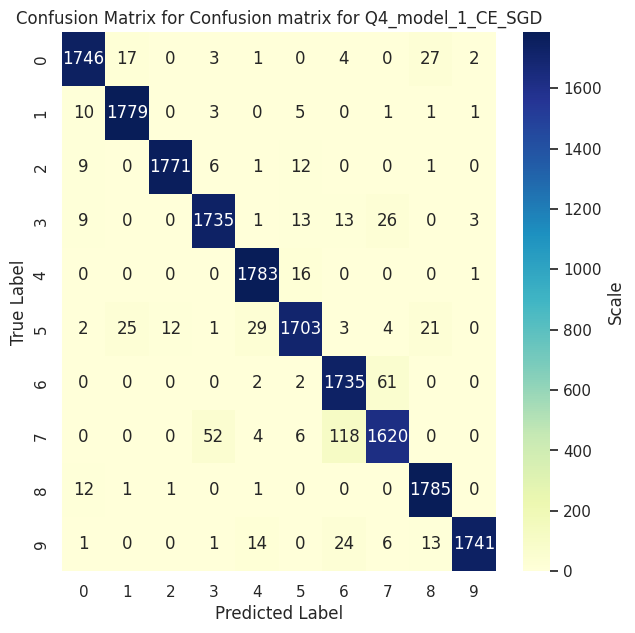

In [ ]:
Q4_model_1_CE_SGD_pred = Q4_model_1_CE_SGD.predict_classes(Q4_X_test)
print("Testing Accuracy: ",np.mean(Q4_model_1_CE_SGD_pred == Q4_y_test))
confusion_matrix_and_F1_score(Q4_model_1_CE_SGD_pred,Q4_y_test,"Confusion matrix for Q4_model_1_CE_SGD")

#### Cross Entropy Loss with Adam

In [ ]:
Q4_model_1_CE_Adam = Model()
Q4_model_1_CE_Adam.add(Layer_Dense(Q4_X_train.shape[1], 10))
Q4_model_1_CE_Adam.add(Activation_Sigmoid())
Q4_model_1_CE_Adam.add(Activation_Softmax())
Q4_model_1_CE_Adam.set(
 loss = Loss_CategoricalCrossentropy(),
 optimizer = Optimizer_Adam(learning_rate = 0.002, decay=1e-5),
 accuracy=Accuracy_Categorical()
)

Q4_model_1_CE_Adam.finalize()
Q4_model_1_CE_Adam.train(Q4_X_train, Q4_y_train, validation_data=(Q4_X_val, Q4_y_val),
 epochs=30, batch_size=128)

epoch: 1
Training---> acc: 0.856, loss: 1.696 (data_loss: 1.696, reg_loss: 0.000), lr: 0.0019953309256340165
Validation---> acc: 0.917, loss: 1.593
epoch: 2
Training---> acc: 0.921, loss: 1.578 (data_loss: 1.578, reg_loss: 0.000), lr: 0.0019906637868397216
Validation---> acc: 0.932, loss: 1.561
epoch: 3
Training---> acc: 0.933, loss: 1.556 (data_loss: 1.556, reg_loss: 0.000), lr: 0.0019860184302510327
Validation---> acc: 0.937, loss: 1.548
epoch: 4
Training---> acc: 0.938, loss: 1.545 (data_loss: 1.545, reg_loss: 0.000), lr: 0.001981394703731957
Validation---> acc: 0.939, loss: 1.541
epoch: 5
Training---> acc: 0.942, loss: 1.538 (data_loss: 1.538, reg_loss: 0.000), lr: 0.001976792456559986
Validation---> acc: 0.941, loss: 1.537
epoch: 6
Training---> acc: 0.944, loss: 1.534 (data_loss: 1.534, reg_loss: 0.000), lr: 0.001972211539409717
Validation---> acc: 0.942, loss: 1.534
epoch: 7
Training---> acc: 0.946, loss: 1.530 (data_loss: 1.530, reg_loss: 0.000), lr: 0.001967651804336705
Validat

In [ ]:
print("Final Training Error: ",Q4_model_1_CE_Adam.train_loss[-1])
print("Final Training Accuracy: ",Q4_model_1_CE_Adam.train_acc[-1])
print("Final Validation Error: ",Q4_model_1_CE_Adam.val_loss[-1])
print("Final Validation Accuracy: ",Q4_model_1_CE_Adam.val_acc[-1])

Final Training Error:  1.5067912863896533
Final Training Accuracy:  0.9571333333333333
Final Validation Error:  1.5202534383197062
Final Validation Accuracy:  0.9465833333333333


##### Evaluating on Test Data

Testing Accuracy:  0.9655
F1- Scores:  [0.97202015 0.98260149 0.99162479 0.96120569 0.97673145 0.956743
 0.9390507  0.92062589 0.97364847 0.98025945]


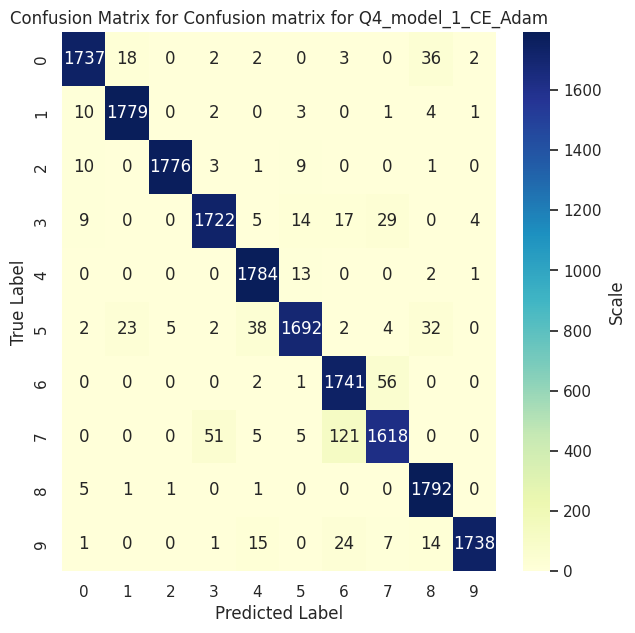

In [ ]:
Q4_model_1_CE_Adam_pred = Q4_model_1_CE_Adam.predict_classes(Q4_X_test)
print("Testing Accuracy: ",np.mean(Q4_model_1_CE_Adam_pred == Q4_y_test))
confusion_matrix_and_F1_score(Q4_model_1_CE_Adam_pred,Q4_y_test,"Confusion matrix for Q4_model_1_CE_Adam")

#### Mean Squared Error Loss (with SGD)

In [ ]:
Q4_model_1_MSE_SGD = Model()
Q4_model_1_MSE_SGD.add(Layer_Dense(Q4_X_train.shape[1], 10))
Q4_model_1_MSE_SGD.add(Activation_Sigmoid())
Q4_model_1_MSE_SGD.add(Activation_Softmax())
Q4_model_1_MSE_SGD.set(
 loss = Loss_MeanSquaredError(),
 optimizer = Optimizer_SGD(learning_rate = 0.1, decay=1e-5,momentum = 0.9),
 accuracy=Accuracy_Categorical()
)

Q4_model_1_MSE_SGD.finalize()
Q4_model_1_MSE_SGD.train(Q4_X_train, Q4_y_train, validation_data=(Q4_X_val, Q4_y_val),
 epochs=30, batch_size=128)

epoch: 1
Training---> acc: 0.821, loss: 0.076 (data_loss: 0.076, reg_loss: 0.000), lr: 0.09976654628170083
Validation---> acc: 0.906, loss: 0.072
epoch: 2
Training---> acc: 0.904, loss: 0.071 (data_loss: 0.071, reg_loss: 0.000), lr: 0.09953318934198607
Validation---> acc: 0.919, loss: 0.070
epoch: 3
Training---> acc: 0.914, loss: 0.070 (data_loss: 0.070, reg_loss: 0.000), lr: 0.09930092151255165
Validation---> acc: 0.925, loss: 0.070
epoch: 4
Training---> acc: 0.921, loss: 0.070 (data_loss: 0.070, reg_loss: 0.000), lr: 0.09906973518659784
Validation---> acc: 0.929, loss: 0.069
epoch: 5
Training---> acc: 0.926, loss: 0.069 (data_loss: 0.069, reg_loss: 0.000), lr: 0.0988396228279993
Validation---> acc: 0.932, loss: 0.069
epoch: 6
Training---> acc: 0.929, loss: 0.069 (data_loss: 0.069, reg_loss: 0.000), lr: 0.09861057697048586
Validation---> acc: 0.935, loss: 0.069
epoch: 7
Training---> acc: 0.932, loss: 0.069 (data_loss: 0.069, reg_loss: 0.000), lr: 0.09838259021683524
Validation---> acc

In [ ]:
print("Final Training Error: ",Q4_model_1_MSE_SGD.train_loss[-1])
print("Final Training Accuracy: ",Q4_model_1_MSE_SGD.train_acc[-1])
print("Final Validation Error: ",Q4_model_1_MSE_SGD.val_loss[-1])
print("Final Validation Accuracy: ",Q4_model_1_MSE_SGD.val_acc[-1])

Final Training Error:  0.06789278262548354
Final Training Accuracy:  0.9476666666666667
Final Validation Error:  0.06799661737031884
Final Validation Accuracy:  0.9466666666666667


##### Evaluating on Test Data

Testing Accuracy:  0.9628333333333333
F1- Scores:  [0.97017445 0.97847682 0.98807212 0.95885115 0.97931034 0.95828636
 0.92957746 0.90809249 0.97731621 0.97938435]


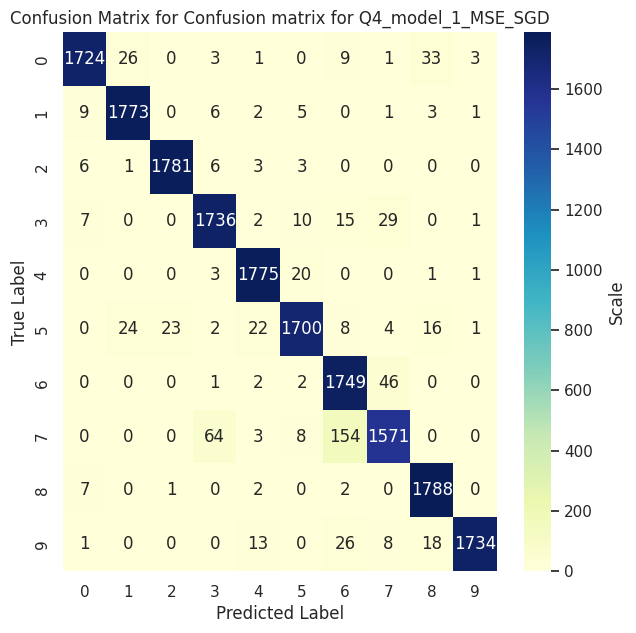

In [ ]:
Q4_model_1_MSE_SGD_pred = Q4_model_1_MSE_SGD.predict_classes(Q4_X_test)
print("Testing Accuracy: ",np.mean(Q4_model_1_MSE_SGD_pred == Q4_y_test))
confusion_matrix_and_F1_score(Q4_model_1_MSE_SGD_pred,Q4_y_test,"Confusion matrix for Q4_model_1_MSE_SGD")

#### Mean Squared Error Loss (with Adam)

In [ ]:
Q4_model_1_MSE_Adam = Model()
Q4_model_1_MSE_Adam.add(Layer_Dense(Q4_X_train.shape[1], 10))
Q4_model_1_MSE_Adam.add(Activation_Sigmoid())
Q4_model_1_MSE_Adam.add(Activation_Softmax())
Q4_model_1_MSE_Adam.set(
 loss = Loss_MeanSquaredError(),
 optimizer = Optimizer_Adam(learning_rate = 0.001, decay=1e-5),
 accuracy=Accuracy_Categorical()
)

Q4_model_1_MSE_Adam.finalize()
Q4_model_1_MSE_Adam.train(Q4_X_train, Q4_y_train, validation_data=(Q4_X_val, Q4_y_val),
 epochs=30, batch_size=128)

epoch: 1
Training---> acc: 0.832, loss: 0.076 (data_loss: 0.076, reg_loss: 0.000), lr: 0.0009976654628170083
Validation---> acc: 0.908, loss: 0.071
epoch: 2
Training---> acc: 0.911, loss: 0.071 (data_loss: 0.071, reg_loss: 0.000), lr: 0.0009953318934198608
Validation---> acc: 0.925, loss: 0.070
epoch: 3
Training---> acc: 0.924, loss: 0.070 (data_loss: 0.070, reg_loss: 0.000), lr: 0.0009930092151255164
Validation---> acc: 0.932, loss: 0.069
epoch: 4
Training---> acc: 0.932, loss: 0.069 (data_loss: 0.069, reg_loss: 0.000), lr: 0.0009906973518659784
Validation---> acc: 0.937, loss: 0.069
epoch: 5
Training---> acc: 0.936, loss: 0.069 (data_loss: 0.069, reg_loss: 0.000), lr: 0.000988396228279993
Validation---> acc: 0.939, loss: 0.069
epoch: 6
Training---> acc: 0.939, loss: 0.069 (data_loss: 0.069, reg_loss: 0.000), lr: 0.0009861057697048586
Validation---> acc: 0.941, loss: 0.068
epoch: 7
Training---> acc: 0.941, loss: 0.068 (data_loss: 0.068, reg_loss: 0.000), lr: 0.0009838259021683524
Vali

In [ ]:
print("Final Training Error: ",Q4_model_1_MSE_Adam.train_loss[-1])
print("Final Training Accuracy: ",Q4_model_1_MSE_Adam.train_acc[-1])
print("Final Validation Error: ",Q4_model_1_MSE_Adam.val_loss[-1])
print("Final Validation Accuracy: ",Q4_model_1_MSE_Adam.val_acc[-1])

Final Training Error:  0.06736832924375306
Final Training Accuracy:  0.9557666666666667
Final Validation Error:  0.06762804498430791
Final Validation Accuracy:  0.94775


##### Evaluating on Test Data

Testing Accuracy:  0.9657777777777777
F1- Scores:  [0.97434467 0.98367008 0.99331849 0.96137816 0.98068433 0.95819398
 0.93301179 0.9129683  0.97809419 0.98137698]


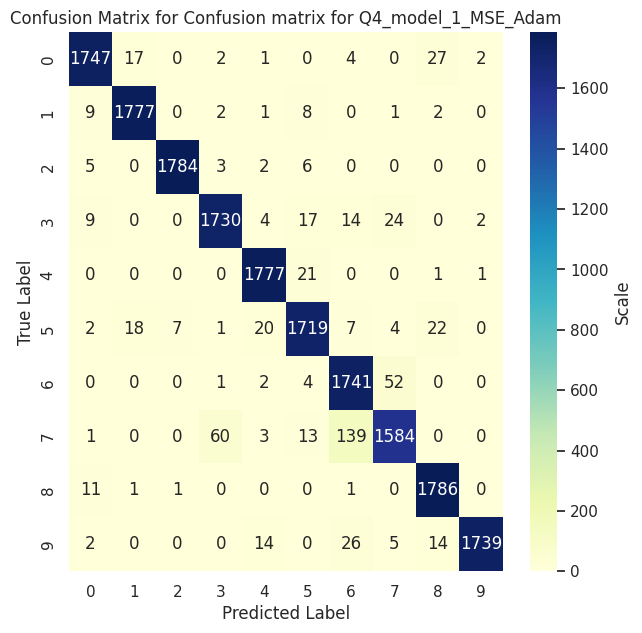

In [ ]:
Q4_model_1_MSE_Adam_pred = Q4_model_1_MSE_Adam.predict_classes(Q4_X_test)
print("Testing Accuracy: ",np.mean(Q4_model_1_MSE_Adam_pred == Q4_y_test))
confusion_matrix_and_F1_score(Q4_model_1_MSE_Adam_pred,Q4_y_test,"Confusion matrix for Q4_model_1_MSE_Adam")

### Model 2
### Hidden Layer = 3 (No of Neurons = (1000,500,100), Activation = ReLU)

#### Cross Entropy Loss with SGD

In [ ]:
Q4_model_2_CE_SGD = Model()
Q4_model_2_CE_SGD.add(Layer_Dense(Q4_X_train.shape[1], 1000))
Q4_model_2_CE_SGD.add(Activation_ReLU())
Q4_model_2_CE_SGD.add(Layer_Dense(1000, 500))
Q4_model_2_CE_SGD.add(Activation_ReLU())
Q4_model_2_CE_SGD.add(Layer_Dense(500, 100))
Q4_model_2_CE_SGD.add(Activation_ReLU())
Q4_model_2_CE_SGD.add(Layer_Dense(100, 10))
#Q4_model_2_CE_SGD.add(Activation_ReLU())
Q4_model_2_CE_SGD.add(Activation_Softmax())
Q4_model_2_CE_SGD.set(
 loss = Loss_CategoricalCrossentropy(),
 optimizer = Optimizer_SGD(learning_rate = 0.02, decay=1e-5,momentum = 0.),
 accuracy=Accuracy_Categorical()
)

Q4_model_2_CE_SGD.finalize()
Q4_model_2_CE_SGD.train(Q4_X_train, Q4_y_train, validation_data=(Q4_X_val, Q4_y_val),
 epochs=30, batch_size=128)

epoch: 1
Training---> acc: 0.115, loss: 2.302 (data_loss: 2.302, reg_loss: 0.000), lr: 0.019953309256340163
Validation---> acc: 0.199, loss: 2.302
epoch: 2
Training---> acc: 0.147, loss: 2.302 (data_loss: 2.302, reg_loss: 0.000), lr: 0.019906637868397217
Validation---> acc: 0.278, loss: 2.302
epoch: 3
Training---> acc: 0.204, loss: 2.301 (data_loss: 2.301, reg_loss: 0.000), lr: 0.01986018430251033
Validation---> acc: 0.343, loss: 2.300
epoch: 4
Training---> acc: 0.306, loss: 2.300 (data_loss: 2.300, reg_loss: 0.000), lr: 0.01981394703731957
Validation---> acc: 0.345, loss: 2.298
epoch: 5
Training---> acc: 0.356, loss: 2.295 (data_loss: 2.295, reg_loss: 0.000), lr: 0.019767924565599858
Validation---> acc: 0.287, loss: 2.289
epoch: 6
Training---> acc: 0.312, loss: 2.257 (data_loss: 2.257, reg_loss: 0.000), lr: 0.019722115394097173
Validation---> acc: 0.247, loss: 2.156
epoch: 7
Training---> acc: 0.264, loss: 1.823 (data_loss: 1.823, reg_loss: 0.000), lr: 0.019676518043367047
Validation--

In [ ]:
print("Final Training Error: ",Q4_model_2_CE_SGD.train_loss[-1])
print("Final Training Accuracy: ",Q4_model_2_CE_SGD.train_acc[-1])
print("Final Validation Error: ",Q4_model_2_CE_SGD.val_loss[-1])
print("Final Validation Accuracy: ",Q4_model_2_CE_SGD.val_acc[-1])

Final Training Error:  0.1081516813591342
Final Training Accuracy:  0.969
Final Validation Error:  0.1580167498150718
Final Validation Accuracy:  0.949


##### Evaluating on Test Data

Testing Accuracy:  0.9624444444444444
F1- Scores:  [0.97678322 0.97678275 0.96851249 0.95519957 0.98322794 0.94295693
 0.93390805 0.91428571 0.98781838 0.98457223]


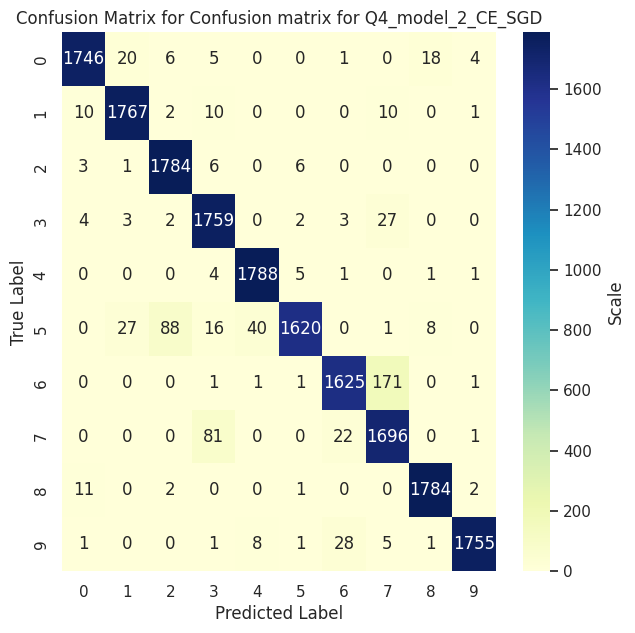

In [ ]:
Q4_model_2_CE_SGD_pred = Q4_model_2_CE_SGD.predict_classes(Q4_X_test)
print("Testing Accuracy: ",np.mean(Q4_model_2_CE_SGD_pred == Q4_y_test))
confusion_matrix_and_F1_score(Q4_model_2_CE_SGD_pred,Q4_y_test,"Confusion matrix for Q4_model_2_CE_SGD")

#### Cross Entropy Loss with Adam

In [ ]:
Q4_model_2_CE_Adam = Model()
Q4_model_2_CE_Adam.add(Layer_Dense(Q4_X_train.shape[1], 1000))
Q4_model_2_CE_Adam.add(Activation_ReLU())
Q4_model_2_CE_Adam.add(Layer_Dense(1000, 500))
Q4_model_2_CE_Adam.add(Activation_ReLU())
Q4_model_2_CE_Adam.add(Layer_Dense(500, 100))
Q4_model_2_CE_Adam.add(Activation_ReLU())
Q4_model_2_CE_Adam.add(Layer_Dense(100, 10))
#Q4_model_2_CE_Adam.add(Activation_ReLU())
Q4_model_2_CE_Adam.add(Activation_Softmax())
Q4_model_2_CE_Adam.set(
 loss = Loss_CategoricalCrossentropy(),
 optimizer = Optimizer_Adam(learning_rate = 0.001, decay=1e-5),
 accuracy=Accuracy_Categorical()
)

Q4_model_2_CE_Adam.finalize()
Q4_model_2_CE_Adam.train(Q4_X_train, Q4_y_train, validation_data=(Q4_X_val, Q4_y_val),
 epochs=30, batch_size=128)

epoch: 1
Training---> acc: 0.744, loss: 0.730 (data_loss: 0.730, reg_loss: 0.000), lr: 0.0009976654628170083
Validation---> acc: 0.878, loss: 0.376
epoch: 2
Training---> acc: 0.921, loss: 0.257 (data_loss: 0.257, reg_loss: 0.000), lr: 0.0009953318934198608
Validation---> acc: 0.930, loss: 0.215
epoch: 3
Training---> acc: 0.942, loss: 0.185 (data_loss: 0.185, reg_loss: 0.000), lr: 0.0009930092151255164
Validation---> acc: 0.943, loss: 0.180
epoch: 4
Training---> acc: 0.956, loss: 0.144 (data_loss: 0.144, reg_loss: 0.000), lr: 0.0009906973518659784
Validation---> acc: 0.947, loss: 0.175
epoch: 5
Training---> acc: 0.962, loss: 0.121 (data_loss: 0.121, reg_loss: 0.000), lr: 0.000988396228279993
Validation---> acc: 0.950, loss: 0.162
epoch: 6
Training---> acc: 0.967, loss: 0.105 (data_loss: 0.105, reg_loss: 0.000), lr: 0.0009861057697048586
Validation---> acc: 0.953, loss: 0.159
epoch: 7
Training---> acc: 0.971, loss: 0.094 (data_loss: 0.094, reg_loss: 0.000), lr: 0.0009838259021683524
Vali

In [ ]:
print("Final Training Error: ",Q4_model_2_CE_Adam.train_loss[-1])
print("Final Training Accuracy: ",Q4_model_2_CE_Adam.train_acc[-1])
print("Final Validation Error: ",Q4_model_2_CE_Adam.val_loss[-1])
print("Final Validation Accuracy: ",Q4_model_2_CE_Adam.val_acc[-1])

Final Training Error:  0.020209754230613282
Final Training Accuracy:  0.9931
Final Validation Error:  0.16985498832089405
Final Validation Accuracy:  0.9644166666666667


##### Evaluating on Test Data

Testing Accuracy:  0.9781111111111112
F1- Scores:  [0.97640855 0.97364847 0.99170813 0.97342193 0.99416829 0.9762309
 0.96450704 0.95621041 0.98715801 0.9877369 ]


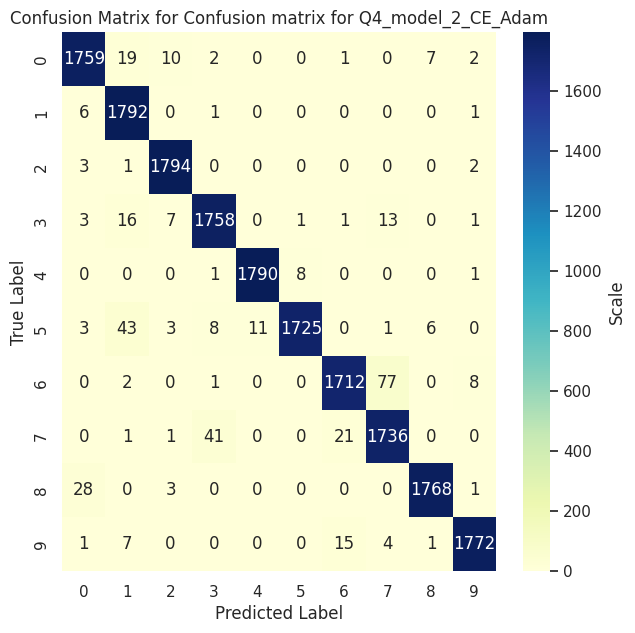

In [ ]:
Q4_model_2_CE_Adam_pred = Q4_model_2_CE_Adam.predict_classes(Q4_X_test)
print("Testing Accuracy: ",np.mean(Q4_model_2_CE_Adam_pred == Q4_y_test))
confusion_matrix_and_F1_score(Q4_model_2_CE_Adam_pred,Q4_y_test,"Confusion matrix for Q4_model_2_CE_Adam")

In [ ]:
num_epochs = np.arange(1,31)

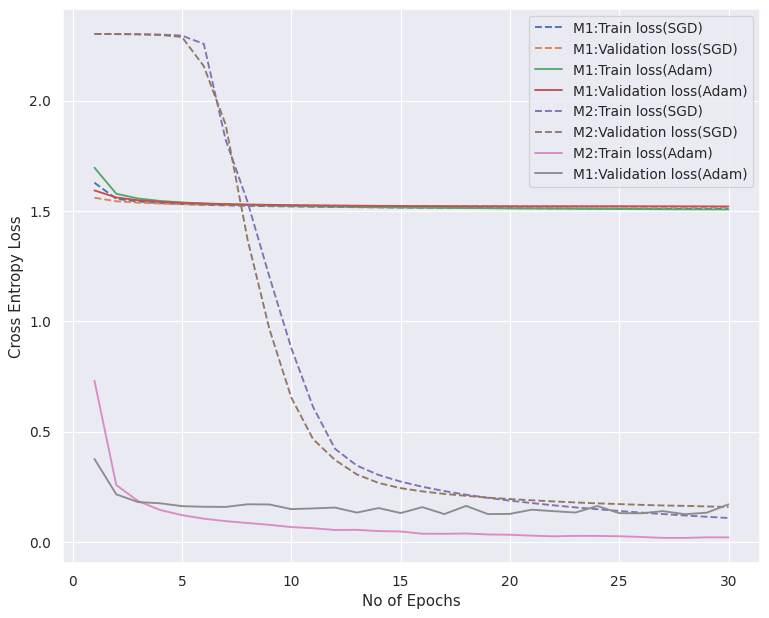

In [ ]:
plt.figure(figsize=(10,8),dpi = 90)
plt.plot(num_epochs,Q4_model_1_CE_SGD.train_loss,'--', label = 'M1:Train loss(SGD)')
plt.plot(num_epochs,Q4_model_1_CE_SGD.val_loss, '--',label = 'M1:Validation loss(SGD)')
plt.plot(num_epochs,Q4_model_1_CE_Adam.train_loss, label = 'M1:Train loss(Adam)')
plt.plot(num_epochs,Q4_model_1_CE_Adam.val_loss,label = 'M1:Validation loss(Adam)')
plt.plot(num_epochs,Q4_model_2_CE_SGD.train_loss,'--',label = 'M2:Train loss(SGD)')
plt.plot(num_epochs,Q4_model_2_CE_SGD.val_loss,'--',label = 'M2:Validation loss(SGD)')
plt.plot(num_epochs,Q4_model_2_CE_Adam.train_loss,label = 'M2:Train loss(Adam)')
plt.plot(num_epochs,Q4_model_2_CE_Adam.val_loss,label = 'M1:Validation loss(Adam)')
plt.xlabel("No of Epochs")
plt.ylabel("Cross Entropy Loss")
plt.legend()

# Problem 5

### Reshaping the input data for CNN and Splitting the Data

In [ ]:
kmnist_reshaped = kmnist[:,0:-1]
kmnist_reshaped = kmnist_reshaped.reshape((60000,1,28,28))

In [ ]:
Q5_X_train,Q5_y_train = kmnist_reshaped[:6000] , kmnist[:6000,-1]
Q5_X_val,Q5_y_val = kmnist_reshaped[6000:30000] , kmnist[6000:30000,-1]
Q5_X_test, Q5_y_test = kmnist_reshaped[30000:], kmnist[30000:,-1]

In [ ]:
keys = np.array(range(Q5_X_train.shape[0]))
np.random.shuffle(keys)
Q5_X_train = Q5_X_train[keys]
Q5_y_train = Q5_y_train[keys]

## Model 1
## Architecture :
### Layer 1 : Convolution (Filer size = 5x5 , No of filters = 5 , Padding = 0, Stride = 1) 
### Layer 2 : ReLU Activation
### Layer 3 : Max Pooling (Window size = 2x2 , Stride = 2)
### Layer 4 : Flatten Layer
### Layer 4 : Fully Connected Layer (No of neurons = 10)
### Layer 5 : Softmax
### Loss : Cross Entropy Loss
### Optimizer : Adam (Learing Rate = 0.01 , Decay = 1e-5)

In [ ]:
Q5_model_1_CE_Adam = Model()
Q5_model_1_CE_Adam.add(Layer_Convolutional((1,28,28),5,5))
Q5_model_1_CE_Adam.add(Activation_ReLU())
Q5_model_1_CE_Adam.add(Layer_Max_Pooling((5,24,24),2,2))
Q5_model_1_CE_Adam.add(Layer_Flatten((5,12,12)))
Q5_model_1_CE_Adam.add(Layer_Dense(720, 10))
Q5_model_1_CE_Adam.add(Activation_Softmax())
Q5_model_1_CE_Adam.set(
 loss = Loss_CategoricalCrossentropy(),
 optimizer = Optimizer_Adam(learning_rate = 0.01, decay=1e-5),
 accuracy=Accuracy_Categorical()
)

Q5_model_1_CE_Adam.finalize()
Q5_model_1_CE_Adam.train(Q5_X_train, Q5_y_train, validation_data=(Q5_X_val, Q5_y_val),
 epochs=5, batch_size=32)

epoch: 1
Training---> acc: 0.748, loss: 6.573 (data_loss: 6.573, reg_loss: 0.000), lr: 0.009981334903730025
Validation---> acc: 0.825, loss: 1.315
epoch: 2
Training---> acc: 0.902, loss: 0.769 (data_loss: 0.769, reg_loss: 0.000), lr: 0.009962640099626403
Validation---> acc: 0.836, loss: 1.598
epoch: 3
Training---> acc: 0.911, loss: 0.798 (data_loss: 0.798, reg_loss: 0.000), lr: 0.009944015194455216
Validation---> acc: 0.816, loss: 2.271
epoch: 4
Training---> acc: 0.920, loss: 0.805 (data_loss: 0.805, reg_loss: 0.000), lr: 0.009925459796925093
Validation---> acc: 0.874, loss: 1.500
epoch: 5
Training---> acc: 0.913, loss: 1.025 (data_loss: 1.025, reg_loss: 0.000), lr: 0.009906973518659785
Validation---> acc: 0.878, loss: 1.724


In [ ]:
Q5_model_1_CE_Adam.train(Q5_X_train, Q5_y_train, validation_data=(Q5_X_val, Q5_y_val),
 epochs=5, batch_size=128)

epoch: 1
Training---> acc: 0.932, loss: 0.821 (data_loss: 0.821, reg_loss: 0.000), lr: 0.009902362703741114
Validation---> acc: 0.853, loss: 2.276
epoch: 2
Training---> acc: 0.935, loss: 0.707 (data_loss: 0.707, reg_loss: 0.000), lr: 0.009897756178674295
Validation---> acc: 0.848, loss: 2.338
epoch: 3
Training---> acc: 0.925, loss: 1.013 (data_loss: 1.013, reg_loss: 0.000), lr: 0.009893153937475268
Validation---> acc: 0.831, loss: 2.821
epoch: 4
Training---> acc: 0.914, loss: 1.174 (data_loss: 1.174, reg_loss: 0.000), lr: 0.009888555974171093
Validation---> acc: 0.854, loss: 2.349
epoch: 5
Training---> acc: 0.918, loss: 1.313 (data_loss: 1.313, reg_loss: 0.000), lr: 0.009883962282799929
Validation---> acc: 0.789, loss: 3.992


In [ ]:
print("Final Training Error: ",Q5_model_1_CE_Adam.train_loss[-1])
print("Final Training Accuracy: ",Q5_model_1_CE_Adam.train_acc[-1])
print("Final Validation Error: ",Q5_model_1_CE_Adam.val_loss[-1])
print("Final Validation Accuracy: ",Q5_model_1_CE_Adam.val_acc[-1])

Final Training Error:  1.313171938243608
Final Training Accuracy:  0.9178333333333333
Final Validation Error:  3.992108011925629
Final Validation Accuracy:  0.7892083333333333


## Model 2
## Architecture :
### Layer 1 : Convolution (Filer size = 5x5 , No of filters = 3 , Padding = 0, Stride = 1) 
### Layer 2 : ReLU Activation
### Layer 3 : Max Pooling (Window size = 2x2 , Stride = 2)
### Layer 4 : Convolution (Filer size = 3x3 , No of filters = 3 , Padding = 0, Stride = 1) 
### Layer 5 : ReLU Activation
### Layer 6 : Flatten Layer
### Layer 7 : Fully Connected Layer (No of neurons = 10)
### Layer 8 : Softmax
### Loss : Cross Entropy Loss
### Optimizer : Adam (Learing Rate = 0.01 , Decay = 1e-5)

In [ ]:
Q5_model_2_CE_Adam = Model()
Q5_model_2_CE_Adam.add(Layer_Convolutional((1,28,28),5,3))
Q5_model_2_CE_Adam.add(Activation_ReLU())
Q5_model_2_CE_Adam.add(Layer_Max_Pooling((3,24,24),2,2))
Q5_model_2_CE_Adam.add(Layer_Convolutional((3,12,12),3,3))
Q5_model_2_CE_Adam.add(Activation_ReLU())
Q5_model_2_CE_Adam.add(Layer_Flatten((3,10,10)))
Q5_model_2_CE_Adam.add(Layer_Dense(300, 10))
Q5_model_2_CE_Adam.add(Activation_Softmax())
Q5_model_2_CE_Adam.set(
 loss = Loss_CategoricalCrossentropy(),
 optimizer = Optimizer_Adam(learning_rate = 0.01, decay=1e-5),
 accuracy=Accuracy_Categorical()
)

Q5_model_2_CE_Adam.finalize()
Q5_model_2_CE_Adam.train(Q5_X_train, Q5_y_train, validation_data=(Q5_X_val, Q5_y_val),
 epochs=5, batch_size=128)

epoch: 1
Training---> acc: 0.756, loss: 1.164 (data_loss: 1.164, reg_loss: 0.000), lr: 0.009995402115027089
Validation---> acc: 0.738, loss: 1.229
epoch: 2
Training---> acc: 0.902, loss: 0.342 (data_loss: 0.342, reg_loss: 0.000), lr: 0.009990708640963903
Validation---> acc: 0.854, loss: 0.558
epoch: 3
Training---> acc: 0.946, loss: 0.209 (data_loss: 0.209, reg_loss: 0.000), lr: 0.009986019572598362
Validation---> acc: 0.852, loss: 0.580
epoch: 4
Training---> acc: 0.963, loss: 0.147 (data_loss: 0.147, reg_loss: 0.000), lr: 0.009981334903730025
Validation---> acc: 0.858, loss: 0.571
epoch: 5
Training---> acc: 0.971, loss: 0.106 (data_loss: 0.106, reg_loss: 0.000), lr: 0.009976654628170082
Validation---> acc: 0.860, loss: 0.577


In [ ]:
Q5_model_2_CE_Adam.train(Q5_X_train, Q5_y_train, validation_data=(Q5_X_val, Q5_y_val),
 epochs=5, batch_size=128)

epoch: 1
Training---> acc: 0.978, loss: 0.081 (data_loss: 0.081, reg_loss: 0.000), lr: 0.009971978739741328
Validation---> acc: 0.858, loss: 0.602
epoch: 2
Training---> acc: 0.984, loss: 0.063 (data_loss: 0.063, reg_loss: 0.000), lr: 0.009967307232278129
Validation---> acc: 0.848, loss: 0.685
epoch: 3
Training---> acc: 0.987, loss: 0.053 (data_loss: 0.053, reg_loss: 0.000), lr: 0.009962640099626403
Validation---> acc: 0.847, loss: 0.729
epoch: 4
Training---> acc: 0.989, loss: 0.042 (data_loss: 0.042, reg_loss: 0.000), lr: 0.009957977335643586
Validation---> acc: 0.850, loss: 0.763
epoch: 5
Training---> acc: 0.989, loss: 0.041 (data_loss: 0.041, reg_loss: 0.000), lr: 0.009953318934198608
Validation---> acc: 0.854, loss: 0.755


In [ ]:
print("Final Training Error: ",Q5_model_2_CE_Adam.train_loss[-1])
print("Final Training Accuracy: ",Q5_model_2_CE_Adam.train_acc[-1])
print("Final Validation Error: ",Q5_model_2_CE_Adam.val_loss[-1])
print("Final Validation Accuracy: ",Q5_model_2_CE_Adam.val_acc[-1])

Final Training Error:  0.04131014690104857
Final Training Accuracy:  0.9885
Final Validation Error:  0.7546036807218719
Final Validation Accuracy:  0.854


Testing Accuracy:  0.8994666666666666
F1- Scores:  [0.88214559 0.91766291 0.95205124 0.85598443 0.90921386 0.88981723
 0.89374786 0.85749273 0.91721326 0.92904318]


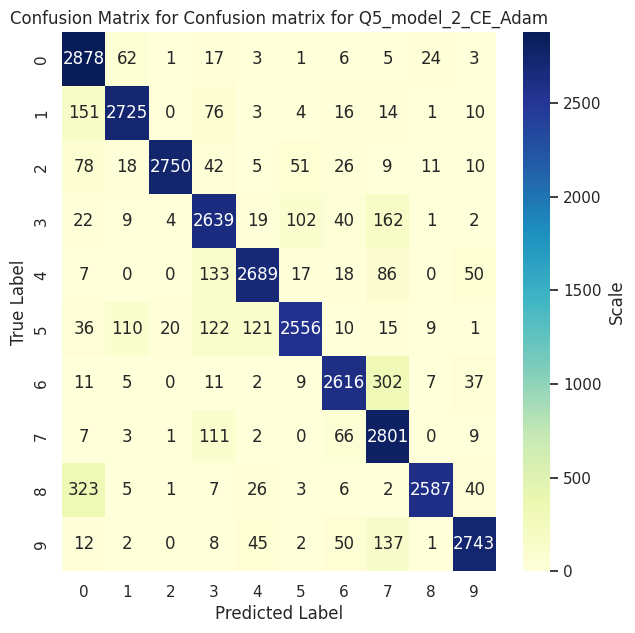

In [ ]:
Q5_model_2_CE_Adam_pred = Q5_model_2_CE_Adam.predict_classes(Q5_X_test)
print("Testing Accuracy: ",np.mean(Q5_model_2_CE_Adam_pred == Q5_y_test))
confusion_matrix_and_F1_score(Q5_model_2_CE_Adam_pred,Q5_y_test,"Confusion matrix for Q5_model_2_CE_Adam")

## Model 3
## Architecture :
### Layer 1 : Convolution (Filer size = 5x5 , No of filters = 3 , Padding = 0, Stride = 1) 
### Layer 2 : Sigmoid Activation
### Layer 3 : Max Pooling (Window size = 2x2 , Stride = 2)
### Layer 4 : Convolution (Filer size = 3x3 , No of filters = 3 , Padding = 0, Stride = 1) 
### Layer 5 : Sigmoid Activation
### Layer 6 : Flatten Layer
### Layer 7 : Fully Connected Layer (No of neurons = 10)
### Layer 8 : Softmax
### Loss : Cross Entropy Loss
### Optimizer : Adam (Learing Rate = 0.01 , Decay = 1e-5)

In [ ]:
Q5_model_3_CE_Adam = Model()
Q5_model_3_CE_Adam.add(Layer_Convolutional((1,28,28),5,3))
Q5_model_3_CE_Adam.add(Activation_Sigmoid())
Q5_model_3_CE_Adam.add(Layer_Max_Pooling((3,24,24),2,2))
Q5_model_3_CE_Adam.add(Layer_Convolutional((3,12,12),3,3))
Q5_model_3_CE_Adam.add(Activation_Sigmoid())
Q5_model_3_CE_Adam.add(Layer_Flatten((3,10,10)))
Q5_model_3_CE_Adam.add(Layer_Dense(300, 10))
Q5_model_3_CE_Adam.add(Activation_Softmax())
Q5_model_3_CE_Adam.set(
 loss = Loss_CategoricalCrossentropy(),
 optimizer = Optimizer_Adam(learning_rate = 0.01, decay=1e-5),
 accuracy=Accuracy_Categorical()
)

Q5_model_3_CE_Adam.finalize()
Q5_model_3_CE_Adam.train(Q5_X_train, Q5_y_train, validation_data=(Q5_X_val, Q5_y_val),
 epochs=5, batch_size=128)

epoch: 1
Training---> acc: 0.699, loss: 1.357 (data_loss: 1.357, reg_loss: 0.000), lr: 0.009995402115027089
Validation---> acc: 0.776, loss: 0.797
epoch: 2
Training---> acc: 0.864, loss: 0.519 (data_loss: 0.519, reg_loss: 0.000), lr: 0.009990708640963903
Validation---> acc: 0.796, loss: 0.647
epoch: 3
Training---> acc: 0.881, loss: 0.421 (data_loss: 0.421, reg_loss: 0.000), lr: 0.009986019572598362
Validation---> acc: 0.778, loss: 0.691
epoch: 4
Training---> acc: 0.889, loss: 0.390 (data_loss: 0.390, reg_loss: 0.000), lr: 0.009981334903730025
Validation---> acc: 0.813, loss: 0.597
epoch: 5
Training---> acc: 0.887, loss: 0.388 (data_loss: 0.388, reg_loss: 0.000), lr: 0.009976654628170082
Validation---> acc: 0.801, loss: 0.649


In [ ]:
print("Final Training Error: ",Q5_model_3_CE_Adam.train_loss[-1])
print("Final Training Accuracy: ",Q5_model_3_CE_Adam.train_acc[-1])
print("Final Validation Error: ",Q5_model_3_CE_Adam.val_loss[-1])
print("Final Validation Accuracy: ",Q5_model_3_CE_Adam.val_acc[-1])

Final Training Error:  0.3879098934667101
Final Training Accuracy:  0.8873333333333333
Final Validation Error:  0.6485304505505639
Final Validation Accuracy:  0.800875


Testing Accuracy:  0.8538
F1- Scores:  [0.87750411 0.83780718 0.97014161 0.75872369 0.83485812 0.84857482
 0.88823433 0.77771374 0.9169891  0.84271173]


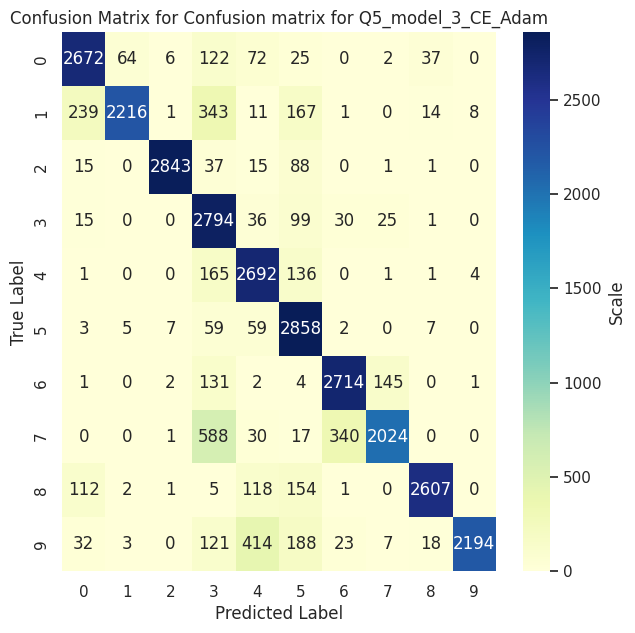

In [ ]:
Q5_model_3_CE_Adam_pred = Q5_model_3_CE_Adam.predict_classes(Q5_X_test)
print("Testing Accuracy: ",np.mean(Q5_model_3_CE_Adam_pred == Q5_y_test))
confusion_matrix_and_F1_score(Q5_model_3_CE_Adam_pred,Q5_y_test,"Confusion matrix for Q5_model_3_CE_Adam")

# Problem 6

### Spiltting Data for Overfitting

In [ ]:
keys = np.array(range(kmnist_reshaped.shape[0]))
keys1 = np.array(range(kmnist_reshaped.shape[0]))
np.random.shuffle(keys)
np.random.shuffle(keys1)
Q6_X_train = kmnist_reshaped[keys[:50]]
Q6_y_train = kmnist[keys[:50],-1]
Q6_X_val = kmnist_reshaped[keys1[:1000]]
Q6_y_val = kmnist[keys1[:1000],-1]

In [ ]:
Q6_model_Overfit_CE = Model()
Q6_model_Overfit_CE.add(Layer_Convolutional((1,28,28),3,5))
Q6_model_Overfit_CE.add(Activation_ReLU())
Q6_model_Overfit_CE.add(Layer_Convolutional((5,26,26),3,5))
Q6_model_Overfit_CE.add(Activation_ReLU())
Q6_model_Overfit_CE.add(Layer_Max_Pooling((5,24,24),2,2))
Q6_model_Overfit_CE.add(Layer_Convolutional((5,12,12),3,5))
Q6_model_Overfit_CE.add(Activation_ReLU())
Q6_model_Overfit_CE.add(Layer_Flatten((5,10,10)))
Q6_model_Overfit_CE.add(Layer_Dense(500, 10))
Q6_model_Overfit_CE.add(Activation_Softmax())
Q6_model_Overfit_CE.set(
 loss = Loss_CategoricalCrossentropy(),
 optimizer = Optimizer_Adam(learning_rate = 0.02, decay=1e-5),
 accuracy=Accuracy_Categorical()
)

Q6_model_Overfit_CE.finalize()
Q6_model_Overfit_CE.train(Q6_X_train, Q6_y_train, validation_data=(Q6_X_val, Q6_y_val),
 epochs=50, batch_size=128)

epoch: 1
Training---> acc: 0.100, loss: 7.536 (data_loss: 7.536, reg_loss: 0.000), lr: 0.02
Validation---> acc: 0.369, loss: 73.403
epoch: 2
Training---> acc: 0.560, loss: 51.527 (data_loss: 51.527, reg_loss: 0.000), lr: 0.019999800001999978
Validation---> acc: 0.152, loss: 82.382
epoch: 3
Training---> acc: 0.380, loss: 49.680 (data_loss: 49.680, reg_loss: 0.000), lr: 0.019999600007999843
Validation---> acc: 0.278, loss: 64.987
epoch: 4
Training---> acc: 0.540, loss: 34.362 (data_loss: 34.362, reg_loss: 0.000), lr: 0.01999940001799946
Validation---> acc: 0.394, loss: 45.663
epoch: 5
Training---> acc: 0.680, loss: 16.043 (data_loss: 16.043, reg_loss: 0.000), lr: 0.019999200031998718
Validation---> acc: 0.468, loss: 31.971
epoch: 6
Training---> acc: 0.860, loss: 2.605 (data_loss: 2.605, reg_loss: 0.000), lr: 0.0199990000499975
Validation---> acc: 0.548, loss: 25.575
epoch: 7
Training---> acc: 1.000, loss: 0.005 (data_loss: 0.005, reg_loss: 0.000), lr: 0.01999880007199568
Validation---> a

### With L2 Regularization 

In [ ]:
Q6_model_Overfit_CE_L2_Reg = Model()
Q6_model_Overfit_CE_L2_Reg.add(Layer_Convolutional((1,28,28),3,5, weight_regularizer_l2 = 0.01,bias_regularizer_l2=0.01))
Q6_model_Overfit_CE_L2_Reg.add(Activation_ReLU())
Q6_model_Overfit_CE_L2_Reg.add(Layer_Convolutional((5,26,26),3,5,weight_regularizer_l2 = 0.01,bias_regularizer_l2=0.01))
Q6_model_Overfit_CE_L2_Reg.add(Activation_ReLU())
Q6_model_Overfit_CE_L2_Reg.add(Layer_Max_Pooling((5,24,24),2,2))
Q6_model_Overfit_CE_L2_Reg.add(Layer_Convolutional((5,12,12),3,5,weight_regularizer_l2 = 0.01,bias_regularizer_l2=0.01))
Q6_model_Overfit_CE_L2_Reg.add(Activation_ReLU())
Q6_model_Overfit_CE_L2_Reg.add(Layer_Flatten((5,10,10)))
Q6_model_Overfit_CE_L2_Reg.add(Layer_Dense(500, 10,weight_regularizer_l2 = 0.01,bias_regularizer_l2=0.01))
Q6_model_Overfit_CE_L2_Reg.add(Activation_Softmax())
Q6_model_Overfit_CE_L2_Reg.set(
 loss = Loss_CategoricalCrossentropy(),
 optimizer = Optimizer_Adam(learning_rate = 0.02, decay=1e-5),
 accuracy=Accuracy_Categorical()
)

Q6_model_Overfit_CE_L2_Reg.finalize()
Q6_model_Overfit_CE_L2_Reg.train(Q6_X_train, Q6_y_train, validation_data=(Q6_X_val, Q6_y_val),
 epochs=50, batch_size=32)

epoch: 1
Training---> acc: 0.120, loss: 116.391 (data_loss: 49.328, reg_loss: 67.063), lr: 0.019999800001999978
Validation---> acc: 0.104, loss: 134.026
epoch: 2
Training---> acc: 0.080, loss: 190.490 (data_loss: 127.427, reg_loss: 63.063), lr: 0.01999940001799946
Validation---> acc: 0.131, loss: 175.116
epoch: 3
Training---> acc: 0.220, loss: 204.336 (data_loss: 145.009, reg_loss: 59.328), lr: 0.0199990000499975
Validation---> acc: 0.113, loss: 135.037
epoch: 4
Training---> acc: 0.180, loss: 179.140 (data_loss: 123.319, reg_loss: 55.821), lr: 0.01999860009799314
Validation---> acc: 0.083, loss: 162.773
epoch: 5
Training---> acc: 0.120, loss: 224.216 (data_loss: 171.700, reg_loss: 52.516), lr: 0.019998200161985422
Validation---> acc: 0.163, loss: 163.656
epoch: 6
Training---> acc: 0.120, loss: 213.710 (data_loss: 164.304, reg_loss: 49.406), lr: 0.019997800241973382
Validation---> acc: 0.096, loss: 138.364
epoch: 7
Training---> acc: 0.160, loss: 160.065 (data_loss: 113.573, reg_loss: 46

### With L1 Regularization 

In [ ]:
Q6_model_Overfit_CE_L1_Reg = Model()
Q6_model_Overfit_CE_L1_Reg.add(Layer_Convolutional((1,28,28),3,5, weight_regularizer_l1 = 0.01,bias_regularizer_l1=0.01))
Q6_model_Overfit_CE_L1_Reg.add(Activation_ReLU())
Q6_model_Overfit_CE_L1_Reg.add(Layer_Convolutional((5,26,26),3,5,weight_regularizer_l1 = 0.01,bias_regularizer_l1=0.01))
Q6_model_Overfit_CE_L1_Reg.add(Activation_ReLU())
Q6_model_Overfit_CE_L1_Reg.add(Layer_Max_Pooling((5,24,24),2,2))
Q6_model_Overfit_CE_L1_Reg.add(Layer_Convolutional((5,12,12),3,5,weight_regularizer_l1 = 0.01,bias_regularizer_l1=0.01))
Q6_model_Overfit_CE_L1_Reg.add(Activation_ReLU())
Q6_model_Overfit_CE_L1_Reg.add(Layer_Flatten((5,10,10)))
Q6_model_Overfit_CE_L1_Reg.add(Layer_Dense(500, 10,weight_regularizer_l1 = 0.01,bias_regularizer_l1=0.01))
Q6_model_Overfit_CE_L1_Reg.add(Activation_Softmax())
Q6_model_Overfit_CE_L1_Reg.set(
 loss = Loss_CategoricalCrossentropy(),
 optimizer = Optimizer_Adam(learning_rate = 0.02, decay=1e-5),
 accuracy=Accuracy_Categorical()
)

Q6_model_Overfit_CE_L1_Reg.finalize()
Q6_model_Overfit_CE_L1_Reg.train(Q6_X_train, Q6_y_train, validation_data=(Q6_X_val, Q6_y_val),
 epochs=50, batch_size=32)

epoch: 1
Training---> acc: 0.100, loss: 91.493 (data_loss: 35.636, reg_loss: 55.857), lr: 0.019999800001999978
Validation---> acc: 0.100, loss: 130.925
epoch: 2
Training---> acc: 0.140, loss: 176.495 (data_loss: 122.915, reg_loss: 53.580), lr: 0.01999940001799946
Validation---> acc: 0.176, loss: 146.426
epoch: 3
Training---> acc: 0.180, loss: 183.754 (data_loss: 132.365, reg_loss: 51.389), lr: 0.0199990000499975
Validation---> acc: 0.255, loss: 106.585
epoch: 4
Training---> acc: 0.380, loss: 132.287 (data_loss: 83.110, reg_loss: 49.176), lr: 0.01999860009799314
Validation---> acc: 0.190, loss: 86.758
epoch: 5
Training---> acc: 0.400, loss: 93.412 (data_loss: 46.280, reg_loss: 47.132), lr: 0.019998200161985422
Validation---> acc: 0.364, loss: 32.122
epoch: 6
Training---> acc: 0.800, loss: 55.421 (data_loss: 10.286, reg_loss: 45.136), lr: 0.019997800241973382
Validation---> acc: 0.431, loss: 18.837
epoch: 7
Training---> acc: 0.820, loss: 46.713 (data_loss: 3.487, reg_loss: 43.226), lr: 0

### With L1 + L2 Regularization 

In [ ]:
Q6_model_Overfit_CE_L1_L2_Reg = Model()
Q6_model_Overfit_CE_L1_L2_Reg.add(Layer_Convolutional((1,28,28),3,5, weight_regularizer_l1 = 0.005,bias_regularizer_l1=0.005,weight_regularizer_l2 = 0.005,bias_regularizer_l2=0.005))
Q6_model_Overfit_CE_L1_L2_Reg.add(Activation_ReLU())
Q6_model_Overfit_CE_L1_L2_Reg.add(Layer_Convolutional((5,26,26),3,5,weight_regularizer_l1 = 0.005,bias_regularizer_l1=0.005,weight_regularizer_l2 = 0.005,bias_regularizer_l2=0.005))
Q6_model_Overfit_CE_L1_L2_Reg.add(Activation_ReLU())
Q6_model_Overfit_CE_L1_L2_Reg.add(Layer_Max_Pooling((5,24,24),2,2))
Q6_model_Overfit_CE_L1_L2_Reg.add(Layer_Convolutional((5,12,12),3,5,weight_regularizer_l1 = 0.005,bias_regularizer_l1=0.005,weight_regularizer_l2 = 0.005,bias_regularizer_l2=0.005))
Q6_model_Overfit_CE_L1_L2_Reg.add(Activation_ReLU())
Q6_model_Overfit_CE_L1_L2_Reg.add(Layer_Flatten((5,10,10)))
Q6_model_Overfit_CE_L1_L2_Reg.add(Layer_Dense(500, 10,weight_regularizer_l1 = 0.005,bias_regularizer_l1=0.005,weight_regularizer_l2 = 0.005,bias_regularizer_l2=0.005))
Q6_model_Overfit_CE_L1_L2_Reg.add(Activation_Softmax())
Q6_model_Overfit_CE_L1_L2_Reg.set(
 loss = Loss_CategoricalCrossentropy(),
 optimizer = Optimizer_Adam(learning_rate = 0.02, decay=1e-5),
 accuracy=Accuracy_Categorical()
)

Q6_model_Overfit_CE_L1_L2_Reg.finalize()
Q6_model_Overfit_CE_L1_L2_Reg.train(Q6_X_train, Q6_y_train, validation_data=(Q6_X_val, Q6_y_val),
 epochs=50, batch_size=32)

epoch: 1
Training---> acc: 0.100, loss: 91.614 (data_loss: 30.053, reg_loss: 61.562), lr: 0.019999800001999978
Validation---> acc: 0.269, loss: 85.663
epoch: 2
Training---> acc: 0.360, loss: 123.011 (data_loss: 64.576, reg_loss: 58.435), lr: 0.01999940001799946
Validation---> acc: 0.137, loss: 73.753
epoch: 3
Training---> acc: 0.360, loss: 97.861 (data_loss: 42.392, reg_loss: 55.469), lr: 0.0199990000499975
Validation---> acc: 0.315, loss: 49.281
epoch: 4
Training---> acc: 0.500, loss: 76.734 (data_loss: 24.139, reg_loss: 52.595), lr: 0.01999860009799314
Validation---> acc: 0.385, loss: 29.004
epoch: 5
Training---> acc: 0.840, loss: 57.065 (data_loss: 7.184, reg_loss: 49.881), lr: 0.019998200161985422
Validation---> acc: 0.439, loss: 17.544
epoch: 6
Training---> acc: 0.940, loss: 49.159 (data_loss: 1.895, reg_loss: 47.264), lr: 0.019997800241973382
Validation---> acc: 0.442, loss: 15.946
epoch: 7
Training---> acc: 0.940, loss: 45.935 (data_loss: 1.145, reg_loss: 44.790), lr: 0.01999740

## With Early Stopping

In [ ]:
Q6_model_Overfit_CE_Early_stopping = Model()
Q6_model_Overfit_CE_Early_stopping.add(Layer_Convolutional((1,28,28),3,5))
Q6_model_Overfit_CE_Early_stopping.add(Activation_ReLU())
Q6_model_Overfit_CE_Early_stopping.add(Layer_Convolutional((5,26,26),3,5))
Q6_model_Overfit_CE_Early_stopping.add(Activation_ReLU())
Q6_model_Overfit_CE_Early_stopping.add(Layer_Max_Pooling((5,24,24),2,2))
Q6_model_Overfit_CE_Early_stopping.add(Layer_Convolutional((5,12,12),3,5))
Q6_model_Overfit_CE_Early_stopping.add(Activation_ReLU())
Q6_model_Overfit_CE_Early_stopping.add(Layer_Flatten((5,10,10)))
Q6_model_Overfit_CE_Early_stopping.add(Layer_Dense(500, 10))
Q6_model_Overfit_CE_Early_stopping.add(Activation_Softmax())
Q6_model_Overfit_CE_Early_stopping.set(
 loss = Loss_CategoricalCrossentropy(),
 optimizer = Optimizer_Adam(learning_rate = 0.001, decay=1e-5),
 accuracy=Accuracy_Categorical()
)

Q6_model_Overfit_CE_Early_stopping.finalize()
Q6_model_Overfit_CE_Early_stopping.train(Q6_X_train, Q6_y_train, validation_data=(Q6_X_val, Q6_y_val),
 epochs=50, batch_size=128, early_stopping = True, patience = 5)

epoch: 1
Training---> acc: 0.120, loss: 10.770 (data_loss: 10.770, reg_loss: 0.000), lr: 0.001
Validation---> acc: 0.155, loss: 10.447
epoch: 2
Training---> acc: 0.200, loss: 9.548 (data_loss: 9.548, reg_loss: 0.000), lr: 0.0009999900000999989
Validation---> acc: 0.107, loss: 9.130
epoch: 3
Training---> acc: 0.200, loss: 8.098 (data_loss: 8.098, reg_loss: 0.000), lr: 0.0009999800003999922
Validation---> acc: 0.116, loss: 7.649
epoch: 4
Training---> acc: 0.200, loss: 5.825 (data_loss: 5.825, reg_loss: 0.000), lr: 0.000999970000899973
Validation---> acc: 0.145, loss: 8.461
epoch: 5
Training---> acc: 0.120, loss: 5.830 (data_loss: 5.830, reg_loss: 0.000), lr: 0.000999960001599936
Validation---> acc: 0.171, loss: 7.892
epoch: 6
Training---> acc: 0.320, loss: 5.423 (data_loss: 5.423, reg_loss: 0.000), lr: 0.000999950002499875
Validation---> acc: 0.201, loss: 7.205
epoch: 7
Training---> acc: 0.360, loss: 4.579 (data_loss: 4.579, reg_loss: 0.000), lr: 0.000999940003599784
Validation---> acc: 

## With Noise added to Input Data

In [ ]:
Q6_X_train_noise = Q6_X_train + np.random.randn(*(Q6_X_train.shape))


In [ ]:
Q6_model_Overfit_CE_Noise = Model()
Q6_model_Overfit_CE_Noise.add(Layer_Convolutional((1,28,28),3,5))
Q6_model_Overfit_CE_Noise.add(Activation_ReLU())
Q6_model_Overfit_CE_Noise.add(Layer_Convolutional((5,26,26),3,5))
Q6_model_Overfit_CE_Noise.add(Activation_ReLU())
Q6_model_Overfit_CE_Noise.add(Layer_Max_Pooling((5,24,24),2,2))
Q6_model_Overfit_CE_Noise.add(Layer_Convolutional((5,12,12),3,5))
Q6_model_Overfit_CE_Noise.add(Activation_ReLU())
Q6_model_Overfit_CE_Noise.add(Layer_Flatten((5,10,10)))
Q6_model_Overfit_CE_Noise.add(Layer_Dense(500, 10))
Q6_model_Overfit_CE_Noise.add(Activation_Softmax())
Q6_model_Overfit_CE_Noise.set(
 loss = Loss_CategoricalCrossentropy(),
 optimizer = Optimizer_Adam(learning_rate = 0.001, decay=1e-5),
 accuracy=Accuracy_Categorical()
)

Q6_model_Overfit_CE_Noise.finalize()
Q6_model_Overfit_CE_Noise.train(Q6_X_train_noise, Q6_y_train, validation_data=(Q6_X_val, Q6_y_val),
 epochs=50, batch_size=128)

epoch: 1
Training---> acc: 0.060, loss: 11.557 (data_loss: 11.557, reg_loss: 0.000), lr: 0.001
Validation---> acc: 0.134, loss: 6.103
epoch: 2
Training---> acc: 0.200, loss: 7.774 (data_loss: 7.774, reg_loss: 0.000), lr: 0.0009999900000999989
Validation---> acc: 0.141, loss: 5.379
epoch: 3
Training---> acc: 0.220, loss: 5.847 (data_loss: 5.847, reg_loss: 0.000), lr: 0.0009999800003999922
Validation---> acc: 0.143, loss: 5.759
epoch: 4
Training---> acc: 0.320, loss: 4.798 (data_loss: 4.798, reg_loss: 0.000), lr: 0.000999970000899973
Validation---> acc: 0.166, loss: 5.439
epoch: 5
Training---> acc: 0.540, loss: 2.576 (data_loss: 2.576, reg_loss: 0.000), lr: 0.000999960001599936
Validation---> acc: 0.221, loss: 5.327
epoch: 6
Training---> acc: 0.720, loss: 1.694 (data_loss: 1.694, reg_loss: 0.000), lr: 0.000999950002499875
Validation---> acc: 0.246, loss: 5.576
epoch: 7
Training---> acc: 0.780, loss: 1.628 (data_loss: 1.628, reg_loss: 0.000), lr: 0.000999940003599784
Validation---> acc: 0

## With Dropout

In [ ]:
Q6_model_Overfit_CE_Dropout = Model()
Q6_model_Overfit_CE_Dropout.add(Layer_Convolutional((1,28,28),3,5))
Q6_model_Overfit_CE_Dropout.add(Activation_ReLU())
Q6_model_Overfit_CE_Dropout.add(Layer_Convolutional((5,26,26),3,5))
Q6_model_Overfit_CE_Dropout.add(Activation_ReLU())
Q6_model_Overfit_CE_Dropout.add(Layer_Dropout(0.8))
Q6_model_Overfit_CE_Dropout.add(Layer_Max_Pooling((5,24,24),2,2))
Q6_model_Overfit_CE_Dropout.add(Layer_Convolutional((5,12,12),3,5))
Q6_model_Overfit_CE_Dropout.add(Layer_Dropout(0.9))
Q6_model_Overfit_CE_Dropout.add(Activation_ReLU())
Q6_model_Overfit_CE_Dropout.add(Layer_Flatten((5,10,10)))
Q6_model_Overfit_CE_Dropout.add(Layer_Dense(500, 10))
Q6_model_Overfit_CE_Dropout.add(Activation_Softmax())
Q6_model_Overfit_CE_Dropout.set(
 loss = Loss_CategoricalCrossentropy(),
 optimizer = Optimizer_Adam(learning_rate = 0.02, decay=1e-5),
 accuracy=Accuracy_Categorical()
)

Q6_model_Overfit_CE_Dropout.finalize()
Q6_model_Overfit_CE_Dropout.train(Q6_X_train, Q6_y_train, validation_data=(Q6_X_val, Q6_y_val),
 epochs=50, batch_size=128)

epoch: 1
Training---> acc: 0.080, loss: 83.096 (data_loss: 83.096, reg_loss: 0.000), lr: 0.02
Validation---> acc: 0.103, loss: 36.516
epoch: 2
Training---> acc: 0.180, loss: 113.939 (data_loss: 113.939, reg_loss: 0.000), lr: 0.019999800001999978
Validation---> acc: 0.120, loss: 31.516
epoch: 3
Training---> acc: 0.080, loss: 148.811 (data_loss: 148.811, reg_loss: 0.000), lr: 0.019999600007999843
Validation---> acc: 0.193, loss: 23.532
epoch: 4
Training---> acc: 0.220, loss: 144.835 (data_loss: 144.835, reg_loss: 0.000), lr: 0.01999940001799946
Validation---> acc: 0.178, loss: 21.357
epoch: 5
Training---> acc: 0.180, loss: 138.898 (data_loss: 138.898, reg_loss: 0.000), lr: 0.019999200031998718
Validation---> acc: 0.204, loss: 18.392
epoch: 6
Training---> acc: 0.180, loss: 149.899 (data_loss: 149.899, reg_loss: 0.000), lr: 0.0199990000499975
Validation---> acc: 0.215, loss: 15.923
epoch: 7
Training---> acc: 0.140, loss: 145.138 (data_loss: 145.138, reg_loss: 0.000), lr: 0.0199988000719956

### Plotting the effect of different Regularizers

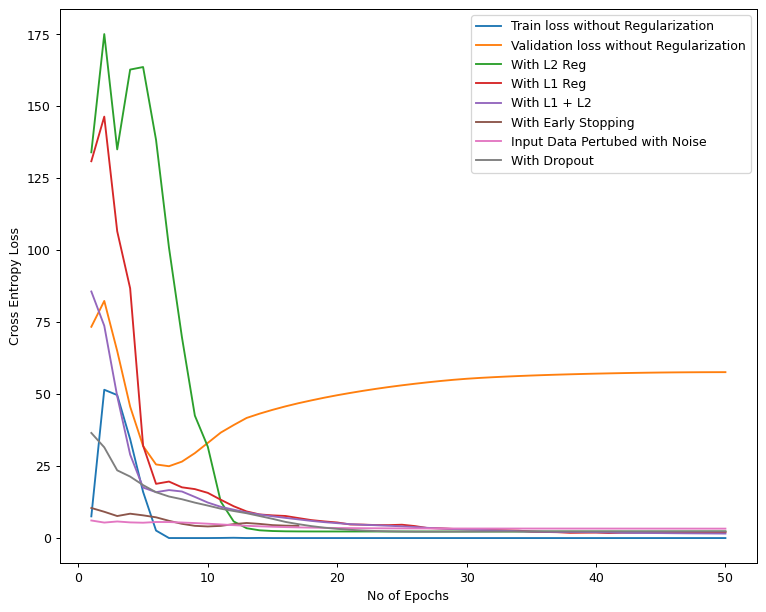

In [ ]:
plt.figure(figsize=(10,8),dpi = 90)
plt.plot(np.arange(1,51),Q6_model_Overfit_CE.train_loss,label = 'Train loss without Regularization')
plt.plot(np.arange(1,51),Q6_model_Overfit_CE.val_loss, label = 'Validation loss without Regularization')
plt.plot(np.arange(1,51),Q6_model_Overfit_CE_L2_Reg.val_loss, label = 'With L2 Reg')
plt.plot(np.arange(1,51),Q6_model_Overfit_CE_L1_Reg.val_loss,label = 'With L1 Reg')
plt.plot(np.arange(1,51),Q6_model_Overfit_CE_L1_L2_Reg.val_loss,label = 'With L1 + L2')
plt.plot(np.arange(1,18),Q6_model_Overfit_CE_Early_stopping.val_loss,label = 'With Early Stopping')
plt.plot(np.arange(1,51),Q6_model_Overfit_CE_Noise.val_loss,label = 'Input Data Pertubed with Noise')
plt.plot(np.arange(1,51),Q6_model_Overfit_CE_Dropout.val_loss,label = 'With Dropout')
plt.xlabel("No of Epochs")
plt.ylabel("Cross Entropy Loss")
plt.grid(False)
plt.rcParams['figure.facecolor'] = 'white'
#plt.rcParams['axes.facecolor'] = 'black'
plt.style.use("default")
plt.legend()
plt.show()

# Problem 7

## Importing and prepocessing Data

In [ ]:
kmnist_pca = np.genfromtxt("/content/drive/MyDrive/PRNN/A1/PCA_MNIST.csv", delimiter=",", dtype=float)

In [ ]:
l = kmnist_pca[1:,:][:,0]
t  =kmnist_pca[1:,:][:,1:]
kmnist_pca = np.column_stack((t,l))

### Normalizing Data

In [ ]:
for i in range(10):
  kmnist_pca[:,i] = (kmnist_pca[:,i] - np.min(kmnist_pca[:,i]))/(np.max(kmnist_pca[:,i])-np.min(kmnist_pca[:,i]))

### Splitting Data into 50:20:30 (Train:Validaton:Test)

In [ ]:
Q7_X_train,Q7_y_train = kmnist_pca[0:30000,:-1] , kmnist_pca[0:30000,-1]
Q7_X_val,Q7_y_val = kmnist_pca[30000:42000,:-1] , kmnist_pca[30000:42000,-1]
Q7_X_test, Q7_y_test = kmnist_pca[42000:,:-1],kmnist_pca[42000:,-1]

In [ ]:
keys = np.array(range(Q7_X_train.shape[0]))
np.random.shuffle(keys)
Q7_X_train = Q7_X_train[keys]
Q7_y_train = Q7_y_train[keys]

### Model 1 
### Hidden layers = 0

#### Cross Entropy Loss with SGD

In [ ]:
Q7_model_1_CE_SGD = Model()
Q7_model_1_CE_SGD.add(Layer_Dense(Q7_X_train.shape[1], 10))
Q7_model_1_CE_SGD.add(Activation_Sigmoid())
Q7_model_1_CE_SGD.add(Activation_Softmax())
Q7_model_1_CE_SGD.set(
 loss = Loss_CategoricalCrossentropy(),
 optimizer = Optimizer_SGD(learning_rate = 0.1, decay=1e-5,momentum = 0.99),
 accuracy=Accuracy_Categorical()
)

Q7_model_1_CE_SGD.finalize()
Q7_model_1_CE_SGD.train(Q7_X_train, Q7_y_train, validation_data=(Q7_X_val, Q7_y_val),
 epochs=30, batch_size=128)

epoch: 1
Training---> acc: 0.599, loss: 2.091 (data_loss: 2.091, reg_loss: 0.000), lr: 0.09976654628170083
Validation---> acc: 0.816, loss: 1.853
epoch: 2
Training---> acc: 0.815, loss: 1.784 (data_loss: 1.784, reg_loss: 0.000), lr: 0.09953318934198607
Validation---> acc: 0.836, loss: 1.724
epoch: 3
Training---> acc: 0.822, loss: 1.721 (data_loss: 1.721, reg_loss: 0.000), lr: 0.09930092151255165
Validation---> acc: 0.845, loss: 1.691
epoch: 4
Training---> acc: 0.828, loss: 1.697 (data_loss: 1.697, reg_loss: 0.000), lr: 0.09906973518659784
Validation---> acc: 0.844, loss: 1.675
epoch: 5
Training---> acc: 0.831, loss: 1.684 (data_loss: 1.684, reg_loss: 0.000), lr: 0.0988396228279993
Validation---> acc: 0.847, loss: 1.665
epoch: 6
Training---> acc: 0.835, loss: 1.676 (data_loss: 1.676, reg_loss: 0.000), lr: 0.09861057697048586
Validation---> acc: 0.848, loss: 1.657
epoch: 7
Training---> acc: 0.837, loss: 1.669 (data_loss: 1.669, reg_loss: 0.000), lr: 0.09838259021683524
Validation---> acc

In [ ]:
print("Final Training Error: ",Q7_model_1_CE_SGD.train_loss[-1])
print("Final Training Accuracy: ",Q7_model_1_CE_SGD.train_acc[-1])
print("Final Validation Error: ",Q7_model_1_CE_SGD.val_loss[-1])
print("Final Validation Accuracy: ",Q7_model_1_CE_SGD.val_acc[-1])

Final Training Error:  1.627667029780536
Final Training Accuracy:  0.8483666666666667
Final Validation Error:  1.616189001954682
Final Validation Accuracy:  0.8573333333333333


##### Evaluating on Test Data

Testing Accuracy:  0.8735555555555555
F1- Scores:  [0.91477273 0.93107282 0.88259833 0.90602543 0.9547711  0.85795017
 0.77621209 0.63729037 0.9309973  0.92552883]


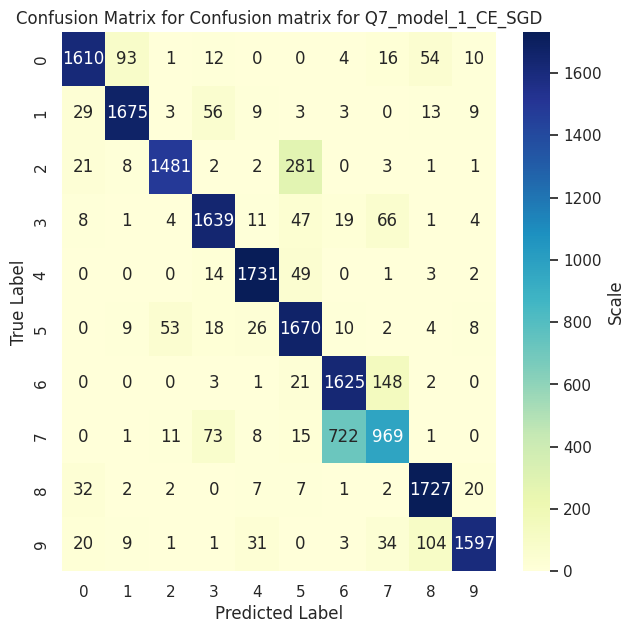

In [ ]:
Q7_model_1_CE_SGD_pred = Q7_model_1_CE_SGD.predict_classes(Q7_X_test)
print("Testing Accuracy: ",np.mean(Q7_model_1_CE_SGD_pred == Q7_y_test))
confusion_matrix_and_F1_score(Q7_model_1_CE_SGD_pred,Q7_y_test,"Confusion matrix for Q7_model_1_CE_SGD")

#### Cross Entropy Loss with Adam

In [ ]:
Q7_model_1_CE_Adam = Model()
Q7_model_1_CE_Adam.add(Layer_Dense(Q7_X_train.shape[1], 10))
Q7_model_1_CE_Adam.add(Activation_Sigmoid())
Q7_model_1_CE_Adam.add(Activation_Softmax())
Q7_model_1_CE_Adam.set(
 loss = Loss_CategoricalCrossentropy(),
 optimizer = Optimizer_Adam(learning_rate = 0.02, decay=1e-5),
 accuracy=Accuracy_Categorical()
)

Q7_model_1_CE_Adam.finalize()
Q7_model_1_CE_Adam.train(Q7_X_train, Q7_y_train, validation_data=(Q7_X_val, Q7_y_val),
 epochs=30, batch_size=128)

epoch: 1
Training---> acc: 0.670, loss: 2.091 (data_loss: 2.091, reg_loss: 0.000), lr: 0.019953309256340163
Validation---> acc: 0.817, loss: 1.933
epoch: 2
Training---> acc: 0.811, loss: 1.867 (data_loss: 1.867, reg_loss: 0.000), lr: 0.019906637868397217
Validation---> acc: 0.827, loss: 1.805
epoch: 3
Training---> acc: 0.818, loss: 1.785 (data_loss: 1.785, reg_loss: 0.000), lr: 0.01986018430251033
Validation---> acc: 0.833, loss: 1.748
epoch: 4
Training---> acc: 0.822, loss: 1.744 (data_loss: 1.744, reg_loss: 0.000), lr: 0.01981394703731957
Validation---> acc: 0.837, loss: 1.716
epoch: 5
Training---> acc: 0.825, loss: 1.719 (data_loss: 1.719, reg_loss: 0.000), lr: 0.019767924565599858
Validation---> acc: 0.839, loss: 1.695
epoch: 6
Training---> acc: 0.827, loss: 1.702 (data_loss: 1.702, reg_loss: 0.000), lr: 0.019722115394097173
Validation---> acc: 0.841, loss: 1.681
epoch: 7
Training---> acc: 0.829, loss: 1.690 (data_loss: 1.690, reg_loss: 0.000), lr: 0.019676518043367047
Validation--

In [ ]:
print("Final Training Error: ",Q7_model_1_CE_Adam.train_loss[-1])
print("Final Training Accuracy: ",Q7_model_1_CE_Adam.train_acc[-1])
print("Final Validation Error: ",Q7_model_1_CE_Adam.val_loss[-1])
print("Final Validation Accuracy: ",Q7_model_1_CE_Adam.val_acc[-1])

Final Training Error:  1.6241075136378516
Final Training Accuracy:  0.8474666666666667
Final Validation Error:  1.612755021489365
Final Validation Accuracy:  0.85275


##### Evaluating on Test Data

Testing Accuracy:  0.8715
F1- Scores:  [0.91626455 0.93043962 0.87058824 0.90632771 0.95384615 0.84926657
 0.7755102  0.63931736 0.92945611 0.92621756]


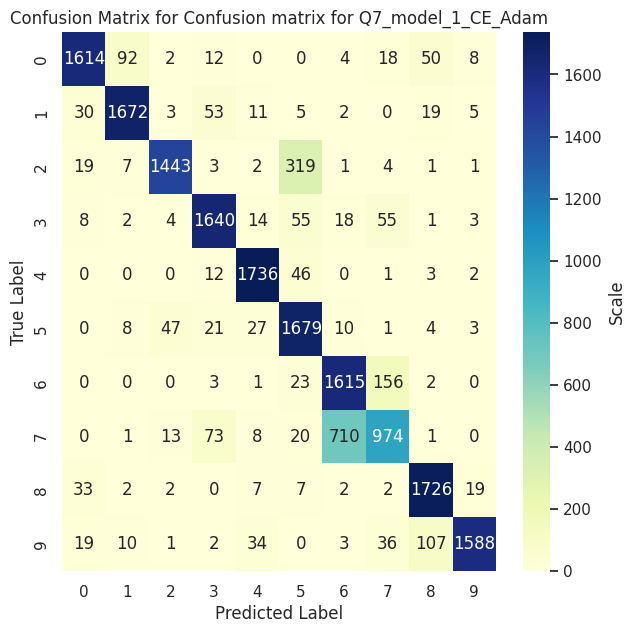

In [ ]:
Q7_model_1_CE_Adam_pred = Q7_model_1_CE_Adam.predict_classes(Q7_X_test)
print("Testing Accuracy: ",np.mean(Q7_model_1_CE_Adam_pred == Q7_y_test))
confusion_matrix_and_F1_score(Q7_model_1_CE_Adam_pred,Q7_y_test,"Confusion matrix for Q7_model_1_CE_Adam")

#### Mean Squared Error Loss (with SGD)

In [ ]:
Q7_model_1_MSE_SGD = Model()
Q7_model_1_MSE_SGD.add(Layer_Dense(Q7_X_train.shape[1], 10))
Q7_model_1_MSE_SGD.add(Activation_Sigmoid())
Q7_model_1_MSE_SGD.add(Activation_Softmax())
Q7_model_1_MSE_SGD.set(
 loss = Loss_MeanSquaredError(),
 optimizer = Optimizer_SGD(learning_rate = 0.1, decay=1e-5,momentum = 0.9),
 accuracy=Accuracy_Categorical()
)

Q7_model_1_MSE_SGD.finalize()
Q7_model_1_MSE_SGD.train(Q7_X_train, Q7_y_train, validation_data=(Q7_X_val, Q7_y_val),
 epochs=30, batch_size=128)

epoch: 1
Training---> acc: 0.159, loss: 0.090 (data_loss: 0.090, reg_loss: 0.000), lr: 0.09976654628170083
Validation---> acc: 0.211, loss: 0.090
epoch: 2
Training---> acc: 0.254, loss: 0.090 (data_loss: 0.090, reg_loss: 0.000), lr: 0.09953318934198607
Validation---> acc: 0.246, loss: 0.089
epoch: 3
Training---> acc: 0.309, loss: 0.089 (data_loss: 0.089, reg_loss: 0.000), lr: 0.09930092151255165
Validation---> acc: 0.319, loss: 0.089
epoch: 4
Training---> acc: 0.394, loss: 0.089 (data_loss: 0.089, reg_loss: 0.000), lr: 0.09906973518659784
Validation---> acc: 0.415, loss: 0.089
epoch: 5
Training---> acc: 0.477, loss: 0.089 (data_loss: 0.089, reg_loss: 0.000), lr: 0.0988396228279993
Validation---> acc: 0.504, loss: 0.089
epoch: 6
Training---> acc: 0.550, loss: 0.089 (data_loss: 0.089, reg_loss: 0.000), lr: 0.09861057697048586
Validation---> acc: 0.583, loss: 0.088
epoch: 7
Training---> acc: 0.616, loss: 0.088 (data_loss: 0.088, reg_loss: 0.000), lr: 0.09838259021683524
Validation---> acc

In [ ]:
print("Final Training Error: ",Q7_model_1_MSE_SGD.train_loss[-1])
print("Final Training Accuracy: ",Q7_model_1_MSE_SGD.train_acc[-1])
print("Final Validation Error: ",Q7_model_1_MSE_SGD.val_loss[-1])
print("Final Validation Accuracy: ",Q7_model_1_MSE_SGD.val_acc[-1])

Final Training Error:  0.08315952872399142
Final Training Accuracy:  0.8017666666666666
Final Validation Error:  0.08296882738016373
Final Validation Accuracy:  0.8235833333333333


##### Evaluating on Test Data

Testing Accuracy:  0.8326666666666667
F1- Scores:  [0.88093907 0.90076336 0.8346056  0.789987   0.89607743 0.82303091
 0.76254502 0.56673241 0.91477886 0.91956712]


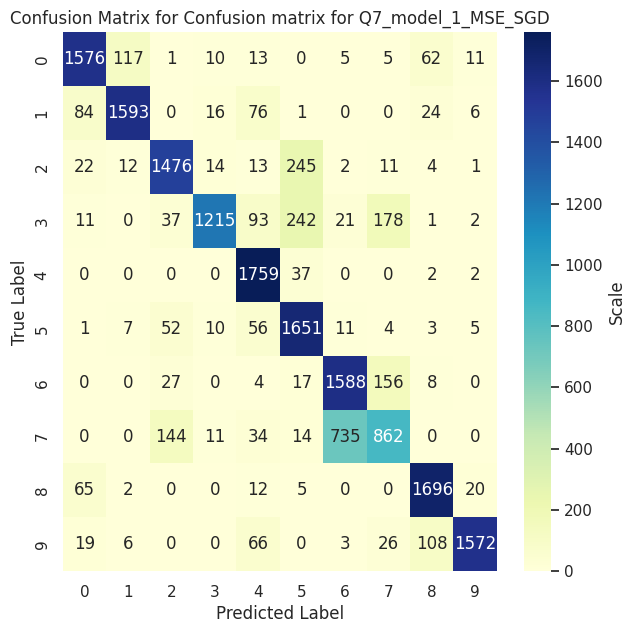

In [ ]:
Q7_model_1_MSE_SGD_pred = Q7_model_1_MSE_SGD.predict_classes(Q7_X_test)
print("Testing Accuracy: ",np.mean(Q7_model_1_MSE_SGD_pred == Q7_y_test))
confusion_matrix_and_F1_score(Q7_model_1_MSE_SGD_pred,Q7_y_test,"Confusion matrix for Q7_model_1_MSE_SGD")

#### Mean Squared Error Loss (with Adam)

In [ ]:
Q7_model_1_MSE_Adam = Model()
Q7_model_1_MSE_Adam.add(Layer_Dense(Q7_X_train.shape[1], 10))
Q7_model_1_MSE_Adam.add(Activation_Sigmoid())
Q7_model_1_MSE_Adam.add(Activation_Softmax())
Q7_model_1_MSE_Adam.set(
 loss = Loss_MeanSquaredError(),
 optimizer = Optimizer_Adam(learning_rate = 0.001, decay=1e-5),
 accuracy=Accuracy_Categorical()
)

Q7_model_1_MSE_Adam.finalize()
Q7_model_1_MSE_Adam.train(Q7_X_train, Q7_y_train, validation_data=(Q7_X_val, Q7_y_val),
 epochs=30, batch_size=128)

epoch: 1
Training---> acc: 0.245, loss: 0.090 (data_loss: 0.090, reg_loss: 0.000), lr: 0.0009976654628170083
Validation---> acc: 0.247, loss: 0.089
epoch: 2
Training---> acc: 0.405, loss: 0.089 (data_loss: 0.089, reg_loss: 0.000), lr: 0.0009953318934198608
Validation---> acc: 0.422, loss: 0.089
epoch: 3
Training---> acc: 0.541, loss: 0.089 (data_loss: 0.089, reg_loss: 0.000), lr: 0.0009930092151255164
Validation---> acc: 0.571, loss: 0.088
epoch: 4
Training---> acc: 0.646, loss: 0.088 (data_loss: 0.088, reg_loss: 0.000), lr: 0.0009906973518659784
Validation---> acc: 0.682, loss: 0.088
epoch: 5
Training---> acc: 0.715, loss: 0.087 (data_loss: 0.087, reg_loss: 0.000), lr: 0.000988396228279993
Validation---> acc: 0.744, loss: 0.087
epoch: 6
Training---> acc: 0.756, loss: 0.087 (data_loss: 0.087, reg_loss: 0.000), lr: 0.0009861057697048586
Validation---> acc: 0.777, loss: 0.087
epoch: 7
Training---> acc: 0.779, loss: 0.086 (data_loss: 0.086, reg_loss: 0.000), lr: 0.0009838259021683524
Vali

In [ ]:
print("Final Training Error: ",Q7_model_1_MSE_Adam.train_loss[-1])
print("Final Training Accuracy: ",Q7_model_1_MSE_Adam.train_acc[-1])
print("Final Validation Error: ",Q7_model_1_MSE_Adam.val_loss[-1])
print("Final Validation Accuracy: ",Q7_model_1_MSE_Adam.val_acc[-1])

Final Training Error:  0.07845007862615519
Final Training Accuracy:  0.8161333333333334
Final Validation Error:  0.07817816482447919
Final Validation Accuracy:  0.8284166666666667


##### Evaluating on Test Data

Testing Accuracy:  0.8409444444444445
F1- Scores:  [0.87898449 0.89842873 0.78886586 0.86595625 0.9222964  0.82155215
 0.77334654 0.60423561 0.90983161 0.91569087]


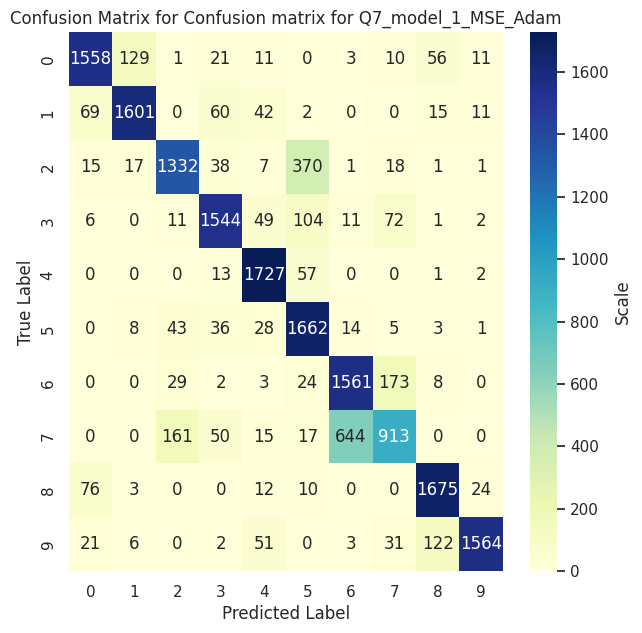

In [ ]:
Q7_model_1_MSE_Adam_pred = Q7_model_1_MSE_Adam.predict_classes(Q7_X_test)
print("Testing Accuracy: ",np.mean(Q7_model_1_MSE_Adam_pred == Q7_y_test))
confusion_matrix_and_F1_score(Q7_model_1_MSE_Adam_pred,Q7_y_test,"Confusion matrix for Q7_model_1_MSE_Adam")

### Model 2
### Hidden Layer = 3 (No of Neurons = (1000,500,100), Activation = ReLU)

#### Cross Entropy Loss with SGD

In [ ]:
Q7_model_2_CE_SGD = Model()
Q7_model_2_CE_SGD.add(Layer_Dense(Q7_X_train.shape[1], 1000))
Q7_model_2_CE_SGD.add(Activation_ReLU())
Q7_model_2_CE_SGD.add(Layer_Dense(1000, 500))
Q7_model_2_CE_SGD.add(Activation_ReLU())
Q7_model_2_CE_SGD.add(Layer_Dense(500, 100))
Q7_model_2_CE_SGD.add(Activation_ReLU())
Q7_model_2_CE_SGD.add(Layer_Dense(100, 10))
#Q7_model_2_CE_SGD.add(Activation_ReLU())
Q7_model_2_CE_SGD.add(Activation_Softmax())
Q7_model_2_CE_SGD.set(
 loss = Loss_CategoricalCrossentropy(),
 optimizer = Optimizer_SGD(learning_rate = 0.1, decay=1e-5,momentum = 0.9),
 accuracy=Accuracy_Categorical()
)

Q7_model_2_CE_SGD.finalize()
Q7_model_2_CE_SGD.train(Q7_X_train, Q7_y_train, validation_data=(Q7_X_val, Q7_y_val),
 epochs=30, batch_size=128)

epoch: 1
Training---> acc: 0.100, loss: 2.304 (data_loss: 2.304, reg_loss: 0.000), lr: 0.09976654628170083
Validation---> acc: 0.100, loss: 2.303
epoch: 2
Training---> acc: 0.100, loss: 2.304 (data_loss: 2.304, reg_loss: 0.000), lr: 0.09953318934198607
Validation---> acc: 0.100, loss: 2.303
epoch: 3
Training---> acc: 0.118, loss: 2.292 (data_loss: 2.292, reg_loss: 0.000), lr: 0.09930092151255165
Validation---> acc: 0.190, loss: 2.027
epoch: 4
Training---> acc: 0.535, loss: 1.153 (data_loss: 1.153, reg_loss: 0.000), lr: 0.09906973518659784
Validation---> acc: 0.803, loss: 0.557
epoch: 5
Training---> acc: 0.812, loss: 0.561 (data_loss: 0.561, reg_loss: 0.000), lr: 0.0988396228279993
Validation---> acc: 0.893, loss: 0.327
epoch: 6
Training---> acc: 0.867, loss: 0.405 (data_loss: 0.405, reg_loss: 0.000), lr: 0.09861057697048586
Validation---> acc: 0.907, loss: 0.274
epoch: 7
Training---> acc: 0.887, loss: 0.344 (data_loss: 0.344, reg_loss: 0.000), lr: 0.09838259021683524
Validation---> acc

In [ ]:
print("Final Training Error: ",Q7_model_2_CE_SGD.train_loss[-1])
print("Final Training Accuracy: ",Q7_model_2_CE_SGD.train_acc[-1])
print("Final Validation Error: ",Q7_model_2_CE_SGD.val_loss[-1])
print("Final Validation Accuracy: ",Q7_model_2_CE_SGD.val_acc[-1])

Final Training Error:  0.1255347932115059
Final Training Accuracy:  0.9567
Final Validation Error:  0.19569294793207942
Final Validation Accuracy:  0.94325


##### Evaluating on Test Data

Testing Accuracy:  0.9595555555555556
F1- Scores:  [0.9631681  0.95479413 0.99195115 0.95098039 0.97827298 0.96868939
 0.93252548 0.90914082 0.97424412 0.9727475 ]


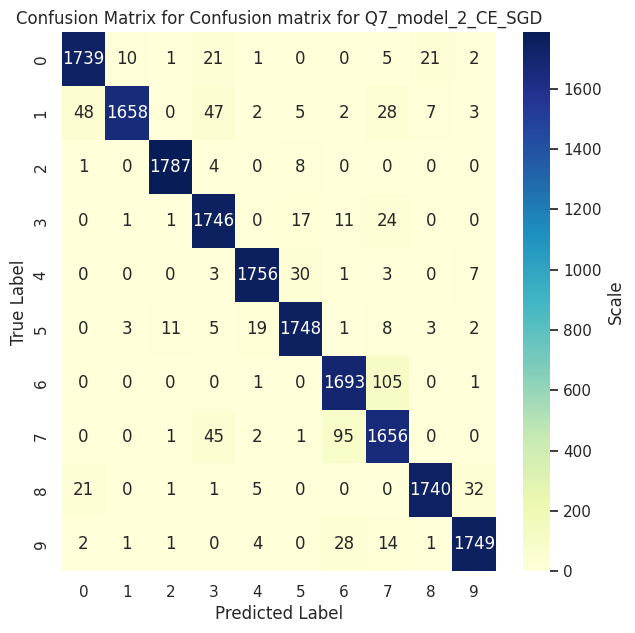

In [ ]:
Q7_model_2_CE_SGD_pred = Q7_model_2_CE_SGD.predict_classes(Q7_X_test)
print("Testing Accuracy: ",np.mean(Q7_model_2_CE_SGD_pred == Q7_y_test))
confusion_matrix_and_F1_score(Q7_model_2_CE_SGD_pred,Q7_y_test,"Confusion matrix for Q7_model_2_CE_SGD")

#### Cross Entropy Loss with Adam

In [ ]:
Q7_model_2_CE_Adam = Model()
Q7_model_2_CE_Adam.add(Layer_Dense(Q7_X_train.shape[1], 1000))
Q7_model_2_CE_Adam.add(Activation_ReLU())
Q7_model_2_CE_Adam.add(Layer_Dense(1000, 500))
Q7_model_2_CE_Adam.add(Activation_ReLU())
Q7_model_2_CE_Adam.add(Layer_Dense(500, 100))
Q7_model_2_CE_Adam.add(Activation_ReLU())
Q7_model_2_CE_Adam.add(Layer_Dense(100, 10))
#Q7_model_2_CE_Adam.add(Activation_ReLU())
Q7_model_2_CE_Adam.add(Activation_Softmax())
Q7_model_2_CE_Adam.set(
 loss = Loss_CategoricalCrossentropy(),
 optimizer = Optimizer_Adam(learning_rate = 0.001, decay=1e-5),
 accuracy=Accuracy_Categorical()
)

Q7_model_2_CE_Adam.finalize()
Q7_model_2_CE_Adam.train(Q7_X_train, Q7_y_train, validation_data=(Q7_X_val, Q7_y_val),
 epochs=30, batch_size=128)

epoch: 1
Training---> acc: 0.384, loss: 1.518 (data_loss: 1.518, reg_loss: 0.000), lr: 0.0009976654628170083
Validation---> acc: 0.532, loss: 1.048
epoch: 2
Training---> acc: 0.633, loss: 0.952 (data_loss: 0.952, reg_loss: 0.000), lr: 0.0009953318934198608
Validation---> acc: 0.692, loss: 0.760
epoch: 3
Training---> acc: 0.753, loss: 0.696 (data_loss: 0.696, reg_loss: 0.000), lr: 0.0009930092151255164
Validation---> acc: 0.785, loss: 0.569
epoch: 4
Training---> acc: 0.824, loss: 0.532 (data_loss: 0.532, reg_loss: 0.000), lr: 0.0009906973518659784
Validation---> acc: 0.841, loss: 0.462
epoch: 5
Training---> acc: 0.860, loss: 0.430 (data_loss: 0.430, reg_loss: 0.000), lr: 0.000988396228279993
Validation---> acc: 0.868, loss: 0.412
epoch: 6
Training---> acc: 0.877, loss: 0.380 (data_loss: 0.380, reg_loss: 0.000), lr: 0.0009861057697048586
Validation---> acc: 0.875, loss: 0.385
epoch: 7
Training---> acc: 0.887, loss: 0.351 (data_loss: 0.351, reg_loss: 0.000), lr: 0.0009838259021683524
Vali

In [ ]:
print("Final Training Error: ",Q7_model_2_CE_Adam.train_loss[-1])
print("Final Training Accuracy: ",Q7_model_2_CE_Adam.train_acc[-1])
print("Final Validation Error: ",Q7_model_2_CE_Adam.val_loss[-1])
print("Final Validation Accuracy: ",Q7_model_2_CE_Adam.val_acc[-1])

Final Training Error:  0.15802312943235844
Final Training Accuracy:  0.9475
Final Validation Error:  0.17722335298665817
Final Validation Accuracy:  0.941


##### Evaluating on Test Data

Testing Accuracy:  0.9612777777777778
F1- Scores:  [0.96458218 0.96285714 0.9889258  0.95142469 0.97502059 0.96162528
 0.93689185 0.90984285 0.98290127 0.97916667]


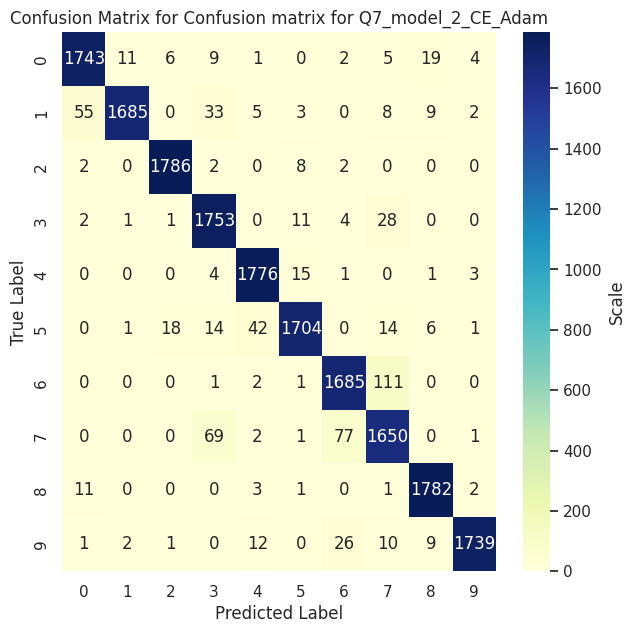

In [ ]:
Q7_model_2_CE_Adam_pred = Q7_model_2_CE_Adam.predict_classes(Q7_X_test)
print("Testing Accuracy: ",np.mean(Q7_model_2_CE_Adam_pred == Q7_y_test))
confusion_matrix_and_F1_score(Q7_model_2_CE_Adam_pred,Q7_y_test,"Confusion matrix for Q7_model_2_CE_Adam")

In [ ]:
num_epochs = np.arange(1,31)

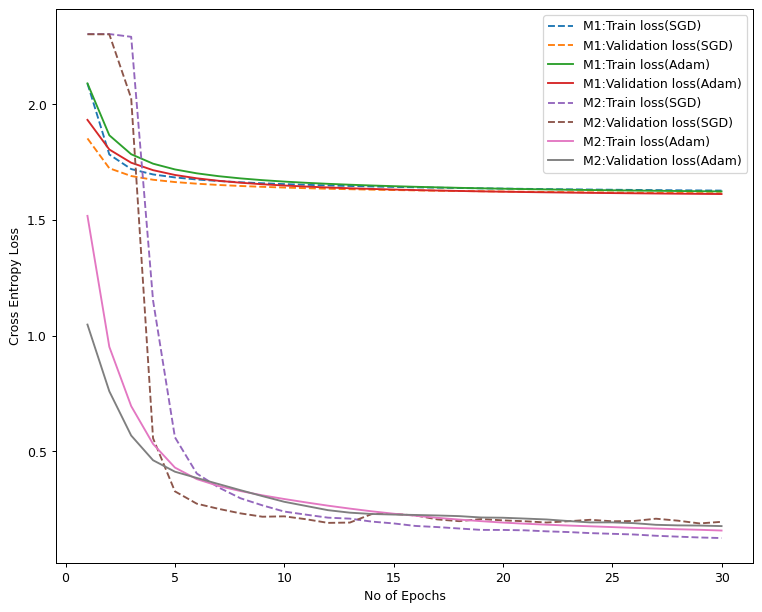

In [ ]:
plt.figure(figsize=(10,8),dpi = 90)
plt.plot(num_epochs,Q7_model_1_CE_SGD.train_loss,'--', label = 'M1:Train loss(SGD)')
plt.plot(num_epochs,Q7_model_1_CE_SGD.val_loss, '--',label = 'M1:Validation loss(SGD)')
plt.plot(num_epochs,Q7_model_1_CE_Adam.train_loss, label = 'M1:Train loss(Adam)')
plt.plot(num_epochs,Q7_model_1_CE_Adam.val_loss,label = 'M1:Validation loss(Adam)')
plt.plot(num_epochs,Q7_model_2_CE_SGD.train_loss,'--',label = 'M2:Train loss(SGD)')
plt.plot(num_epochs,Q7_model_2_CE_SGD.val_loss,'--',label = 'M2:Validation loss(SGD)')
plt.plot(num_epochs,Q7_model_2_CE_Adam.train_loss,label = 'M2:Train loss(Adam)')
plt.plot(num_epochs,Q7_model_2_CE_Adam.val_loss,label = 'M2:Validation loss(Adam)')
plt.xlabel("No of Epochs")
plt.ylabel("Cross Entropy Loss")
plt.grid(False)
plt.rcParams['figure.facecolor'] = 'white'
#plt.rcParams['axes.facecolor'] = 'black'
plt.style.use("default")
plt.legend()